# Исследование данных о компьютерных играх: выявление закономерностей, определяющих успешность игры

## 1. Описание проекта

### 1.1. Цель
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### 1.2. План работы

1. Ознакомиться с данными.
2. Осуществить предобработку данных.
3. Провести исследовательский анализ данных.
   - Проанализировать выпуск игр по годам.
   - Исследовать изменение продаж в зависимости от платформ, на которых выпускаются игры. Определить за какой характерный срок появляются новые и исчезают старые платформы.
   - Определить актуальный период, данные за который будут дальше исследоваться; основной критерий при выборе — эти данные помогут построить прогноз на следующий год.
   - Выбрать потенциально прибыльные платформы.
   - Исследовать зависимость продаж игр от платформ, на которых они выпускаются.
   - Исследовать влияние отзывов пользователей и критиков на продажи игр. 
   - Проанализировать общее распределение игр по жанрам. Определить, как жанры игр влияют на их продажи.

4. Составить портрет пользователя каждого региона. Для пользователя каждого региона (NA, EU, JP) определить:
   - самые популярные платформы (топ-5);
   - самые популярные жанры (топ-5).
   - влияние рейтинга ESRB на продажи.
5. Проверить следующие гипотезы.
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   - Средние пользовательские рейтинги жанров Action и Sports разные.

### 1.3. Описание данных

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Описание столбцов датафрейма:
* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 2. Знакомство с данными

Импортируем необходимые библиотеки и считаем данные из файла.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
data = pd.read_csv('games.csv')

Изучим данные. Для этого выведем первые 10 строк датафрейма, вызовем для него метод `info` и посмотрим гистограммы для числовых столбцов.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


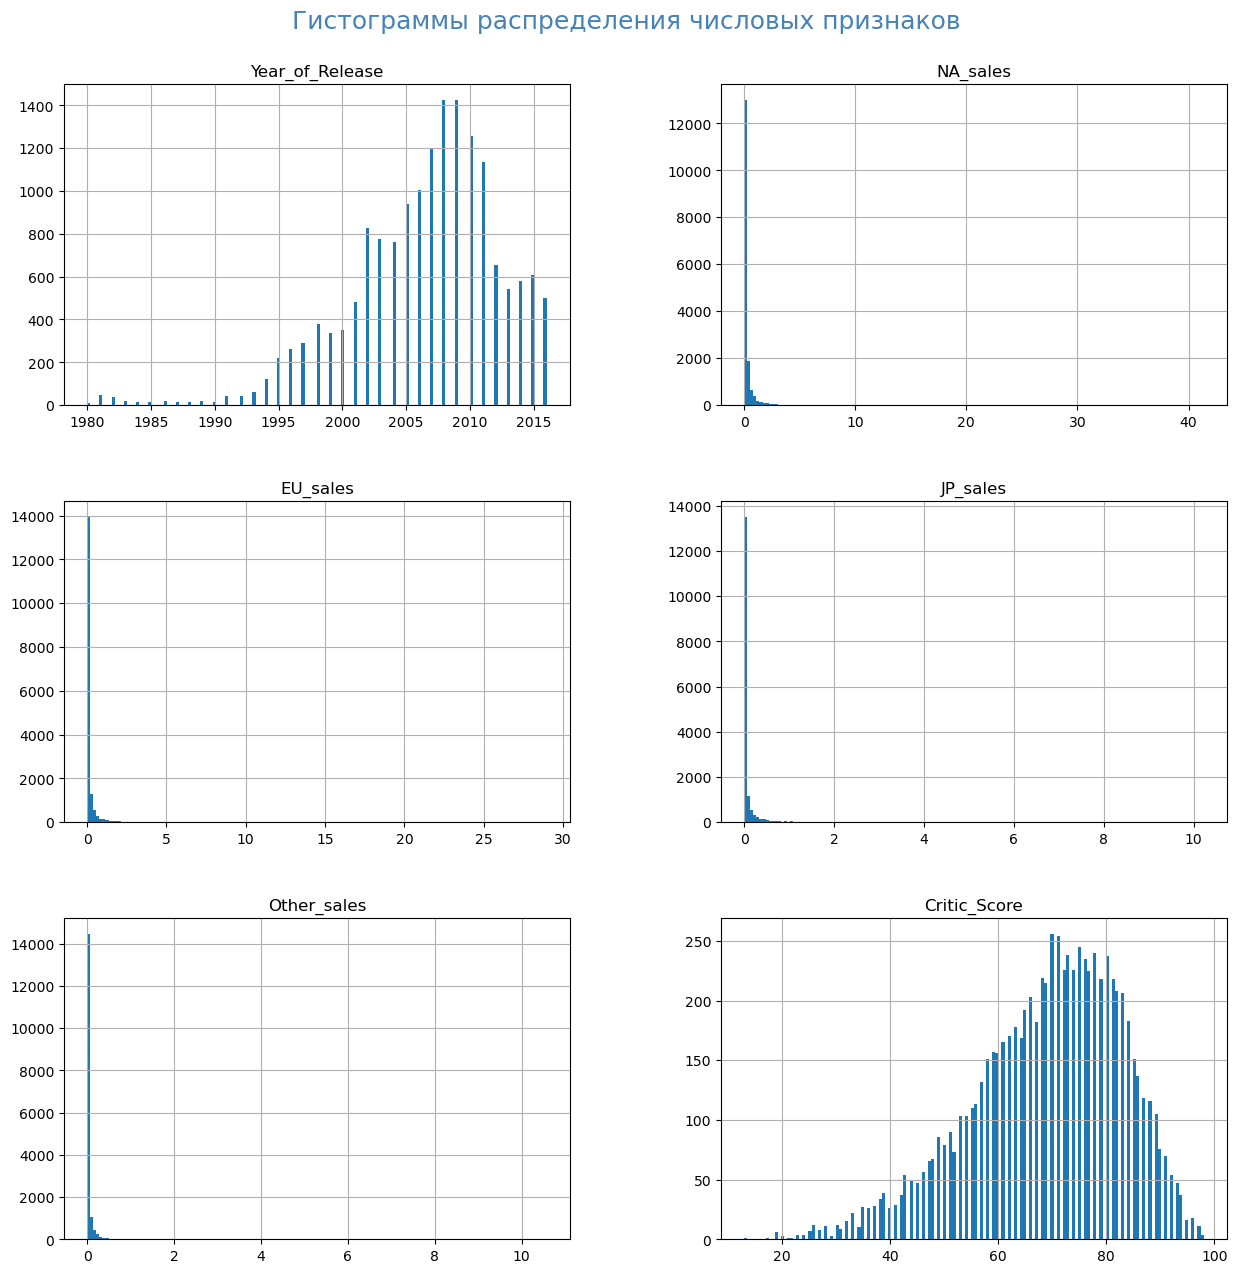

In [5]:
data.hist(figsize=(15, 15), bins=150)
plt.suptitle('Гистограммы распределения числовых признаков', y=0.93, fontsize=18, color='SteelBlue');

**Выводы.**
* В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating` есть пропуски, подробнее мы их рассмотрим далее.
* Типы данных столбцов `User_Score` и `Year_of_Release` не соответствуют содержанию: в первом столбце содержатся числовые данные, однако, указан тип `object`, во втором столбце указан вещественный тип данных, однако, содержатся в нём только целые числа.
* По гистограммам видно, что во всех столбцах с продажами есть выбросы (аномально большие значения), а большинство значений продаж игр по регионам принимают близки к нулю значения (но помним, что значения исчисляются в млн).
* С 1994 и по 2008 год наблюдался рост числа выпускаемых игр, после 2009 - сокращение.
* У подавляющего большинства игр оценка критиков больше 50 из 100, при чаще всего они ставят оценки в диапазоне от 65 до 85.

## 3. Предобработка данных

### 3.1. Изменение названий столбцов

Приведём названия столбцов к нижнему регистру.

In [6]:
data.columns = data.columns.str.lower()

Проверим, что изменения сохранены.

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 3.2. Преобразование типов данных столбцов

Изменим типы данных в следующих столбцах:
* в столбце `user_score` с `object` на `float`, поскольку в этом столбце представлены десятичные дроби;
* в столбце `year_of_release` с `float` на `int`, так как год - это целое число.

Обратим внимание, что есть игры, где в столбце с оценками пользователей стоит аббревиатура "tbd", которая обозначает, что оценки пользователей будут собраны (определены), например, такое значение может появиться в случаях, когда выход игры только анонсирован, или игра вышла недавно. При приведении этого столбца к типу `float` будем использовать метод библиотеки `pandas.to_numeric` с параметром `errors='coerce'`; в этом случае все значения "tbd" будут заменены на NaN. Такой вариант в этом случае подходит лучше всего, поскольку замена значений "tbd" на числовые при анализе может привести к искажению результата, а при установке вместо "tbd" флага, например, "-1", мы будем вынуждены каждый раз использовать условную индексацию для отбрасывания строк с такими значениями, и в итоге они, как и в случае замены на NaN, не будут использованы.

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64', errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Сразу проверим, что изменения были выполнены.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### 3.3. Обработка пропусков

Посмотрим на объем пропусков в столбцах. 

In [10]:
# Функция, которая визуализирует объём пропусков в данных
def pass_value_barh(df):
    if df.isna().sum().sum() > 0:
        ax = (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(12,3), legend=False, fontsize=12)
        )
        ax.set_title('Объём пропусков в данных \n', fontsize=18, color='SteelBlue')
        ax.set_ylabel('Названия столбцов', fontsize=14)
        ax.set_xlabel('% пропусков', fontsize=14)
    else:
        print('В датафрейме нет пропусков.')

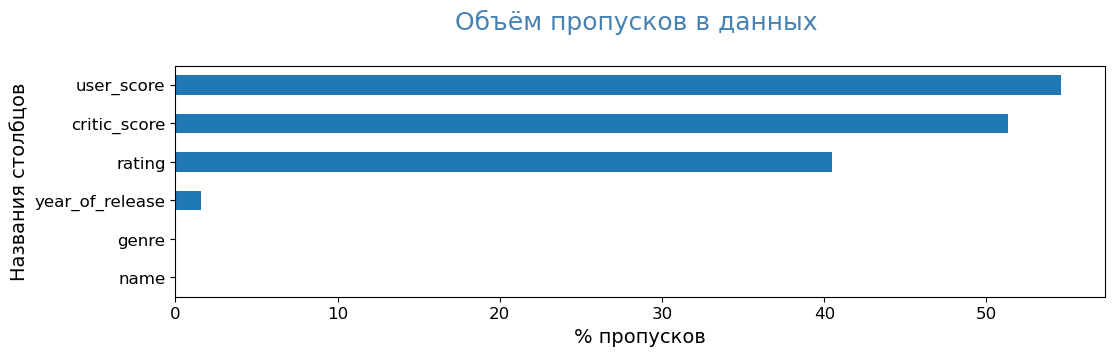

In [11]:
pass_value_barh(data)

Пропуски содержатся в 6 столбцах из 11. 

В столбцах `name` и `genre` пропусков очень мало, единичные случаи. Заполнять пропуски в этих столбцах мы не будем, поскольку не знаем название и жанр игр c пропущенными значениями. 

Заполнять пропуски в остальных столбцах мы также не будем, поскольку по имеющимся данным мы не можем определить в каком году была выпущена игра или какой рейтинг она получила.

Пропуски в `critic_score`, `user_score`, `rating` могут быть вызваны, например, следующим: в прошлом рейтинг и оценки игр меньше отслеживались; из-за небольшого распространения компьютерных игр до 2000 года данных для выставления оценок было недостаточно; для наименее популярных игр рейтинг и оценки могли не определяться вовсе.

Также пропуски во всех столбцах могли появиться в процессе сбора, записи, передачи, обработки данных и т.п.

### 3.4. Добавление нового столбца

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [12]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Проверим, что новый столбец добавлен и в нём ожидаемые значения; для этого выведем первые 5 строк датафрейма.

In [13]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 5. Исследовательский анализ данных

### 5.1. Выпуск игр по годам

Построим гистограмму с распределением количества выпущенных игр по годам.

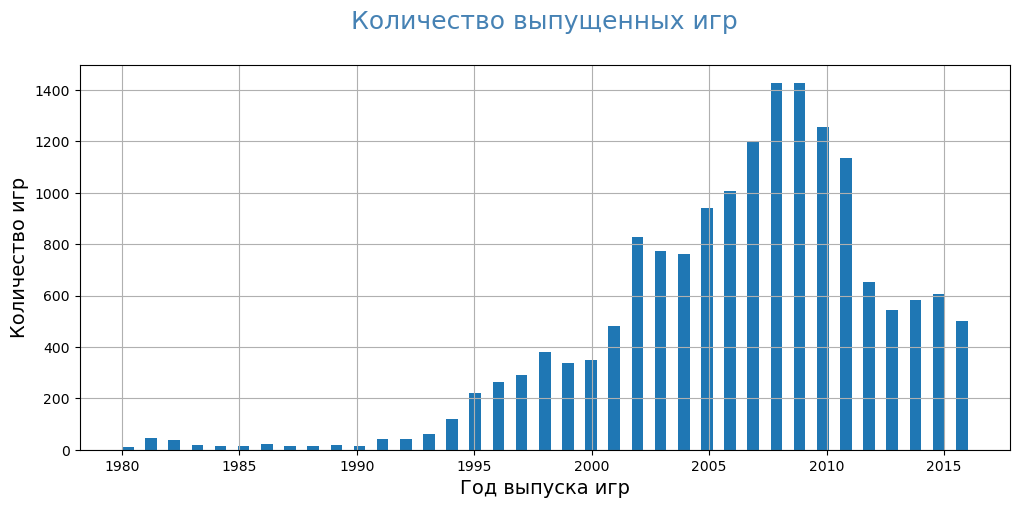

In [14]:
ax = (
    data['year_of_release']
    .plot(kind='hist', figsize=(12,5), bins=73, grid=True)
)
ax.set_title('Количество выпущенных игр\n', fontsize=18, color ='SteelBlue')
ax.set_ylabel('Количество игр', fontsize=14)
ax.set_xlabel('Год выпуска игр', fontsize=14);

По гистограмме видно, что до 1995 года каждый год выпускалось менее 200 компьютерных игр каждый год, а заметный рост числа выпускаемых игр начался после 2001 года. В 2008-2009 годах количество выпускаемых игр достигло своего пика, после чего начало сокращаться.

### 5.2. Изменение продаж игр по платформам

Постротрим, как распределено количество проданных копий по платформам, и выберем платформы с наибольшими суммарными продажами.

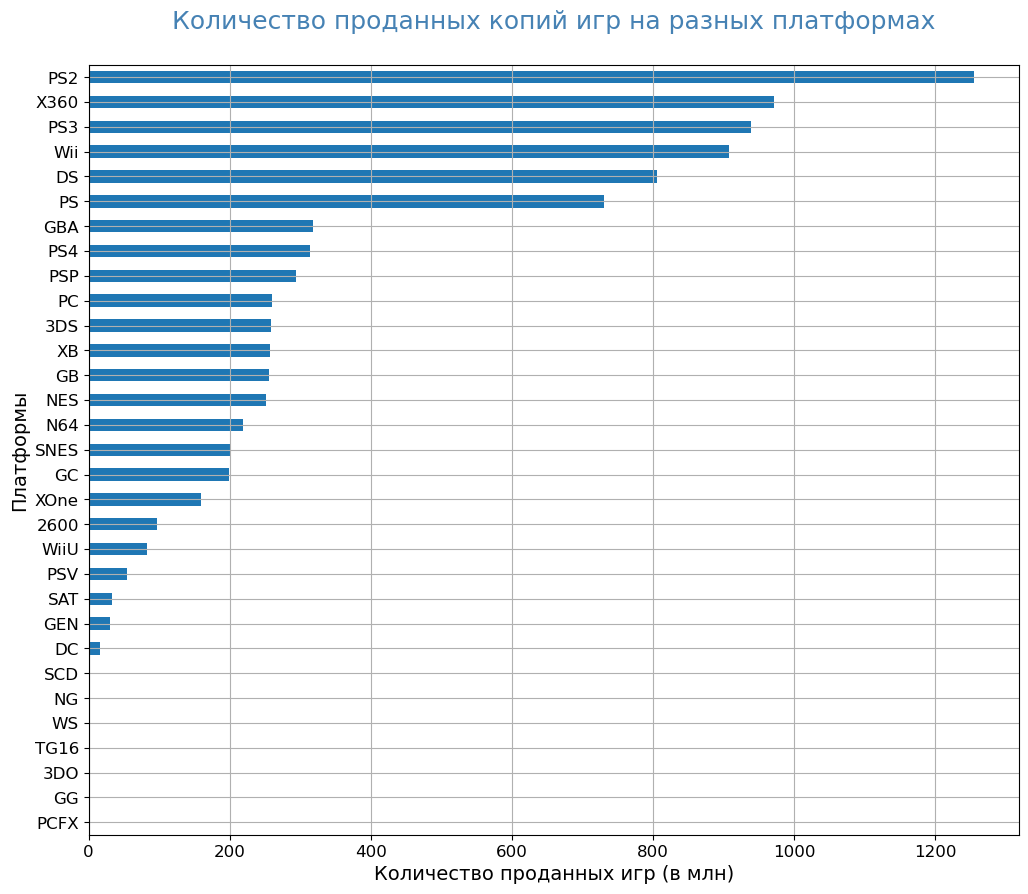

In [15]:
ax = (
    data.groupby(by='platform')['total_sales'].sum()
    .sort_values()
    .plot(kind='barh', figsize=(12,10), xlabel='Платформы', fontsize=12, grid=True)
)
ax.set_title('Количество проданных копий игр на разных платформах\n', fontsize=18, color ='SteelBlue')
ax.set_ylabel('Платформы', fontsize=14)
ax.set_xlabel('Количество проданных игр (в млн)', fontsize=14);

По графику видно, что первые 6 платформ - PS2, X360, PS3, Wii, DS, PS, - имеют наибольшие суммарные продажи; у остальные платформ это значение меньше более чем в 2 раза.

Теперь для этих 6 платформ построим гистограммы распределения продаж по годам.

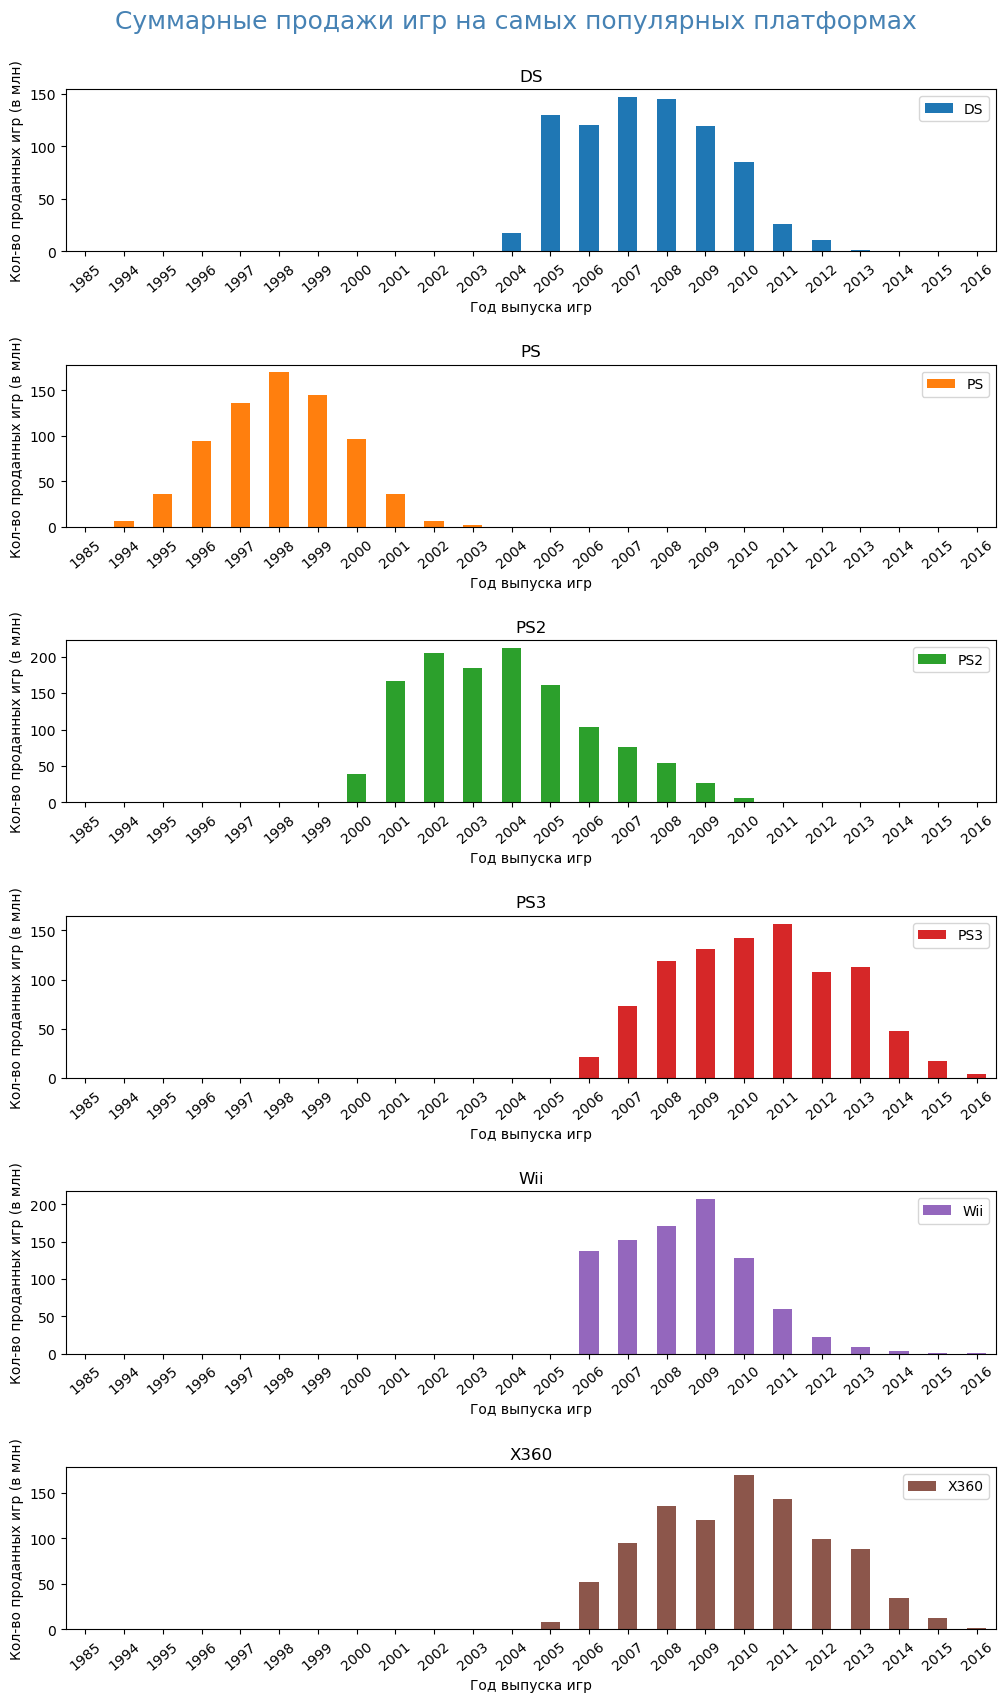

In [16]:
(
    data
    .query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(12,20), subplots=True, sharex=False, rot=40,           
          xlabel='Год выпуска игр', ylabel='Кол-во проданных игр (в млн)')
)

plt.subplots_adjust(hspace=0.7)
plt.suptitle('Суммарные продажи игр на самых популярных платформах', y=0.92, fontsize=18, color='SteelBlue');

Все графики имеют похожий вид. Первые несколько лет платформа набирает популярность: продажи игр на платформе в течение нескольких лет увеличиваются. Затем суммарные продажи достигают своего пика, после чего начинают постепенно снижаться; причём для большинства платформ достаточно 3-4 лет после года с наибольшим количеством продаж, чтобы продажи упали в несколько раз и были близки к своему минимуму. По графикам видно, что весть этот цикл занимает у ставших популярными платформ 10-12 лет.

### 5.3. Выбор потенциально прибыльных платформ

Для начала определим данные за какой период мы будем использовать для поиска потенциально прибыльных платформ. Основной фактор определения актуального периода - данные за этот период помогут построить прогноз на 2017 год.

Чтобы определить актуальный период, ещё раз построим гистограмму с распределением количества выпущенных игр по годам, а также столбчатую диаграмму с суммарными продажами по годам.

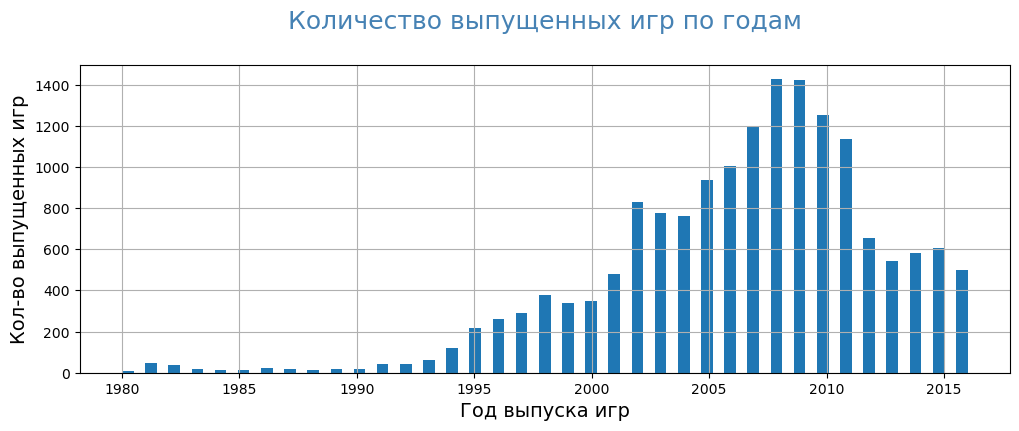

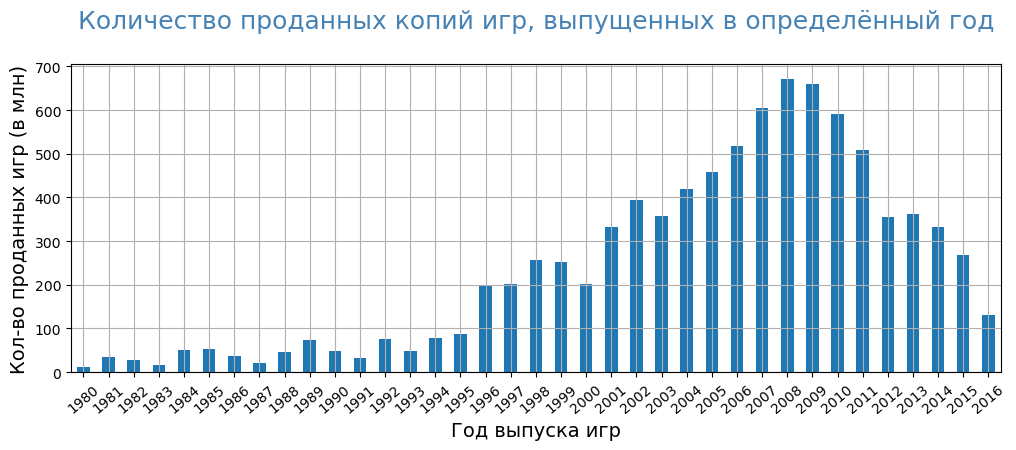

In [17]:
ax = (
    data['year_of_release']
    .plot(kind='hist', figsize=(12,4), bins=73, grid=True, title='Количество выпущенных игр')
)
ax.set_title('Количество выпущенных игр по годам\n', fontsize=18, color ='SteelBlue')
ax.set_xlabel('Год выпуска игр', fontsize=14)
ax.set_ylabel('Кол-во выпущенных игр', fontsize=14)
plt.show()

ax = (
    data.groupby(by='year_of_release')['total_sales'].sum()
    .plot(kind='bar', figsize=(12,4), grid=True, rot=40, title='Количество проданных копий игр')
)
ax.set_title('Количество проданных копий игр, выпущенных в определённый год\n', fontsize=18, color ='SteelBlue')
ax.set_xlabel('Год выпуска игр', fontsize=14)
ax.set_ylabel('Кол-во проданных игр (в млн)', fontsize=14);

По графикам выше видно, что начиная с 2009 года, количество выпускаемых игр и количество продаваемых копий этих игр постепенно сокращаются. Однако в качестве актуального периода мы возьмём период с 2012 по 2016 год, поскольку в 2012 году на обоих графиках можно наблюдать достаточно резкое падение: количество выпускаемых игр сократилось почти вдвое, а количество продаж упало примерно на 30%. Кроме того, вид графика с 2009 по 2011 и с 2012 по 2016 год разный. В течении первого указанного периода наблюдается плавное сокращение количества выпускаемых игр и их продаж; а вот с 2012 года после резкого падания такого плавного убывания не наблюдается, наоборот, мы видим, что показатели начинают колебаться, то есть несмотря на общую тенденцию к убыванию, в какие-то годы наблюдается рост, хоть и незначительный.

Теперь определим потенциально прибыльные платформы. Для этого построим 2 диаграммы:
- диаграмму количества продаж игр по каждой из платформ, для которой хотя бы в один из годов за взятый период определено значение;
- диаграмму с количеством выпускаемых на различных платформах игр.

Однако прежде создадим отдельный датафрейм `data_since_2012` с данными за выбранный период, чтобы в дальнейшем избежать лишней условной индексации.

In [18]:
data_since_2012 = data[data['year_of_release'] >= 2012]

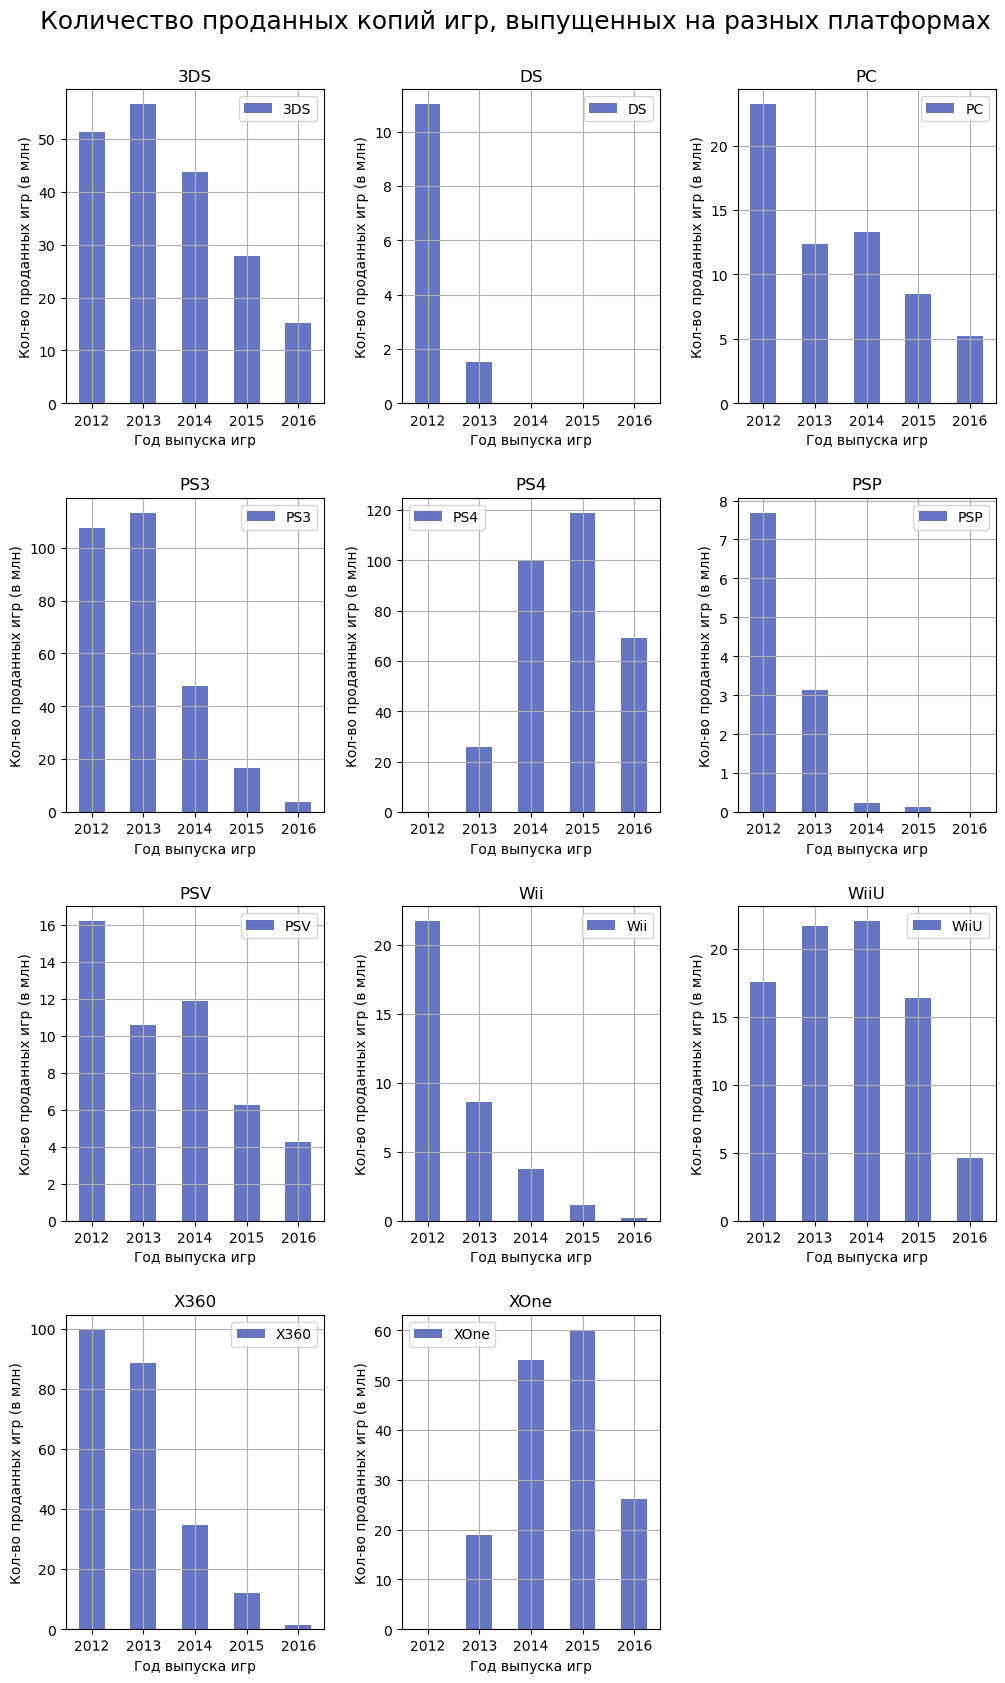

In [19]:
(
    data_since_2012
    .pivot_table(
        index='year_of_release', 
        columns='platform', 
        values='total_sales', 
        aggfunc='sum'
    )
    .plot(
        kind='bar', 
        figsize=(12,20), 
        subplots=True, 
        xlabel='Год выпуска игр',
        ylabel='Кол-во проданных игр (в млн)',       
        layout=(4, 3), 
        sharex=False, 
        rot=1, 
        color=(0, 0.1, 0.6, 0.6),
        grid=True
    )
)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle('Количество проданных копий игр, выпущенных на разных платформах', y=0.92, fontsize=18);

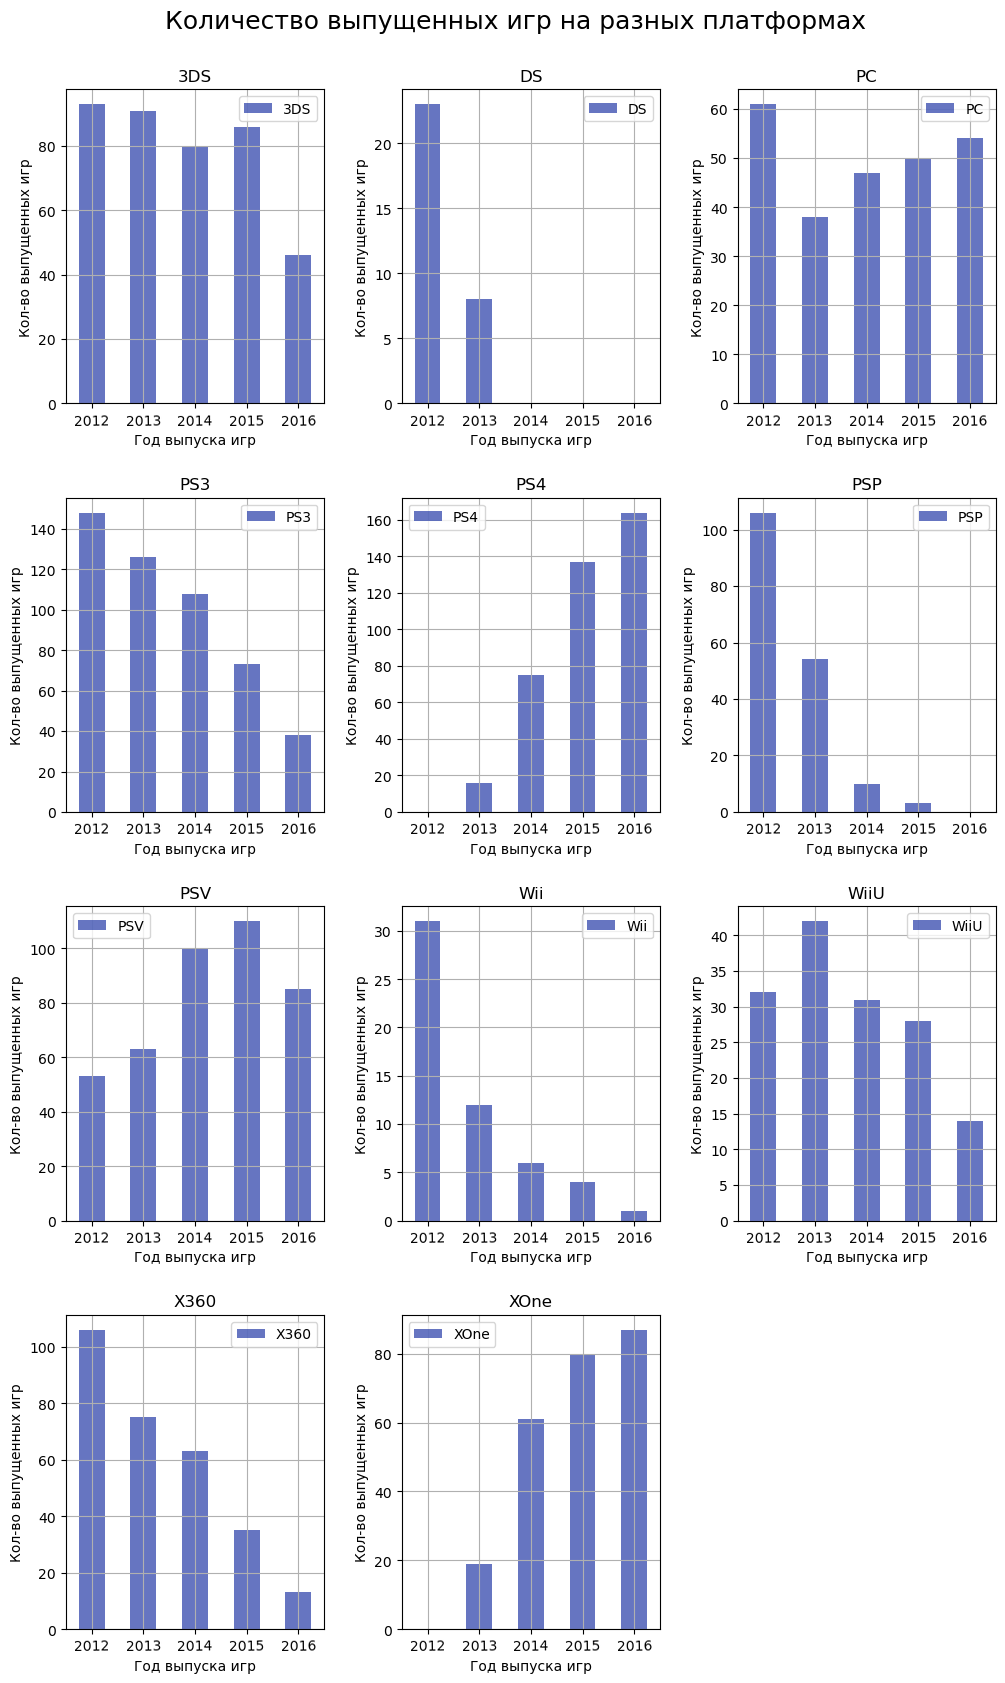

In [20]:
(
    data_since_2012
    .pivot_table(
        index='year_of_release', 
        columns='platform', 
        values='total_sales', 
        aggfunc='count'
    )
    .plot(kind='bar', 
          figsize=(12, 20),
          subplots=True, 
          xlabel='Год выпуска игр',
          ylabel='Кол-во выпущенных игр', 
          layout=(4,3), 
          sharex=False, 
          rot=1, 
          color=(0, 0.1, 0.6, 0.6), 
          grid=True
    )
)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle('Количество выпущенных игр на разных платформах', y=0.92, fontsize=18);

По диаграммам видно, что продажи игр на всех платформах уже достигли своего пика и начали сокращаться. Лидирующими по продажам платформами в 2016 году были 3DS, PS4, XOne: количество проданных копий игр, выпущенных на этих платформах в 2016 году, было больше 15 млн. А вот количество выпускаемых игр сокращается не на всех платформах: для платформ PC, PS4, XOne последние несколько лет наблюдается рост количества выпускаемых игр. Эти же платформы, а также платформа PSV, были лидерами по количеству выпускаемых игр в 2016 году: на каждой из этих платформ было выпущено более 50 игр.

Проанализировав диаграммы, определим следующие условия для выбора потенциально прибыльных платформ.

1. Продажи игр на платформе за 2016 год составляли более 5 млн копий. При этом, если продажи за 2016 год были близки к 5 млн, то в этом случае дополнительно учитываем следующее условие: в период сокращения продаж (все года после года с максимальными продажами) не было таких лет, в которые продажи бы сокращались более, чем на 50% по сравнению с предыдущим годом. Такое условие немного обезопасит нас от того, что в 2017 году продажи резко упадут в 2 раза и более (до 2.5 млн и ниже), однако, не гарантирует этого.
2. Количество выпускаемых игр на платформе должно либо увеличиваться, либо изменения должны быть незначительные (стагнация). Если же количество выпускаемых игр уменьшается, то должны выполняться следующие условия: 1) за 2016 год было выпущено не менее 20 игр на этой платформе; 2) если количество выпущенных в 2016 году примерно равно 20, то в период сокращения количества выпускаемых игр не должно быть таких лет, в которые бы выпуск сокращался более, чем на 50% по сравнению с предыдущим годом. Такое условие немного обезопасит нас от того, что в 2017 году выпуск игр резко упадёт в 2 раза и более (до 10 игр в год и менее), однако, не гарантирует этого.

Этим условиям соответствуют платформы 3DS, PC, PS4, XOne, - будем считать их потенциально прибыльными. Причём наиболее перспективными являются платформы PS4, XOne, поскольку они также были лидерами по продажам в 2016 году, а выпуск игр на этих платформах с каждым годом увеличивается.

### 5.4. Разброc суммарных продаж в разбивке платформам

Построим диаграммы размаха для платформ по количеству проданных копий игр. При построении будем учитывать только данные за актуальный период, то есть с 2012 по 2016 год.

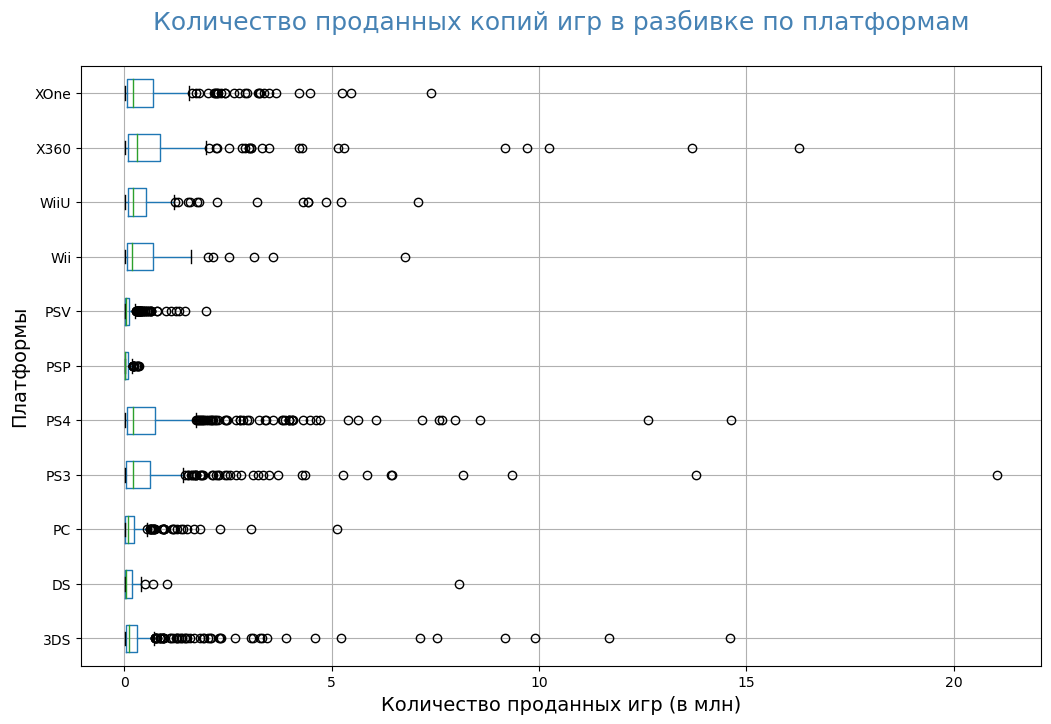

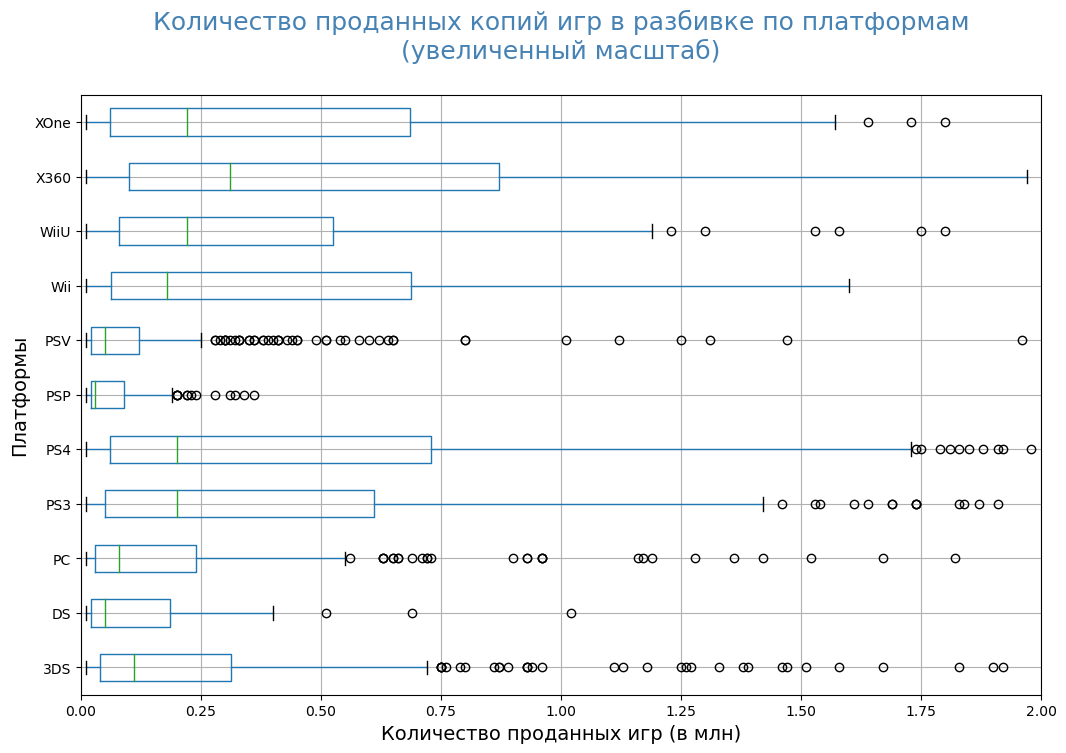

In [21]:
ax = data_since_2012.boxplot(by='platform', column='total_sales', figsize=(12, 8), vert=False)
ax.set_title('Количество проданных копий игр в разбивке по платформам\n', fontsize=18, color ='SteelBlue')
plt.suptitle('')
ax.set_xlabel('Количество проданных игр (в млн)', fontsize=14)
ax.set_ylabel('Платформы', fontsize=14)

ax = data_since_2012.boxplot(by='platform', column='total_sales', figsize=(12, 8), vert=False);
ax.set_title('Количество проданных копий игр в разбивке по платформам\n(увеличенный масштаб)\n', fontsize=18, color ='SteelBlue')
plt.suptitle('')
ax.set_xlabel('Количество проданных игр (в млн)', fontsize=14)
ax.set_ylabel('Платформы', fontsize=14)
plt.xlim(0, 2);

**Выводы.**
* У всех платформ, кроме X360, медианное значение продаж не превышает 0.25 млн копий за одну игру, выпущенную после 2011 года.
* У многих платформ больше 10 выбросов, однако, есть платформы и с небольшим их количеством, такие как DS, PSP, Wii. Это говорит о том, что у остальных платформ было достаточно много игр, продажи которых были значительно больше, чем продажи подавляющего большинства игр на этих платформах. 
* Есть 4 платформы, у которых продажи некоторых игр больше, чем в 40 раз превышают медианное значение, это платформы X360, PS4, PS3, 3DS. 
* Есть 4 платформы с достаточно короткими "коробочками" по сравнению с остальными платформами: PSV, PSP, DS, PS, - то есть 75% игр, выпускаемых с 2012 по 2016 год на этих платформах, продавались примерно одинаково, то есть были одинаково популярны. И напротив, есть платформы с длинными "коробочками" такие, как XOne, X360, Wii, PS4, PS3, что говорит о том, что для этих платформ характерна неравномерная популярность игр.
* Особое внимание привлекает платформа PSP: у неё самая короткая "коробочка", мало выбросов и они достаточно близко расположены в правому "усику" соответствующей диаграммы. То есть все игры, выпускаемые с 2012 по 2016 год, имели примерно одинаковую популярность у пользователей, и лишь небольшое их количество продавалось лучше, чем остальные. Однако даже эти игры с наибольшими продажами не сильно больше (примерно в 10 раз) продаж игр, попавших в "коробочку", в то время как для многих других игр выбросы превосходили медианное значение в несколько десятков раз.

### 5.5. Влияние отзывов на продажи игр

Посмотрим, как влияют на продажи отзывы пользователей и критиков на примере второй по популярности платформе за всё время X360. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Данные будем использовать за актуальный период, то есть с 2012 по 2016 год.

Вспомним, что в столбцах с оценками критиков и пользователей очень много пропусков, больше 50%. Удаление такого объёма строк из датафрейма приведёт к потерям полезной информации в столбцах без пропусков, поэтому удалять строки мы не будем, а лишь исключим из исследования о влиянии отзывов на продажи игр те платформы, для которых данных об отзывах недостаточно для анализа. 

Строить диаграммы и рассчитывать коэффициенты Пирсона мы будем только для тех платформ, для которых за период с 2012 по 2016 год было выпущено не менее 50 игр без пропущенных значениях в столбцах с оценкам критиков или пользователей. Сразу же посмотрим, для каких платформ мы не будем выполнять описанные действия.

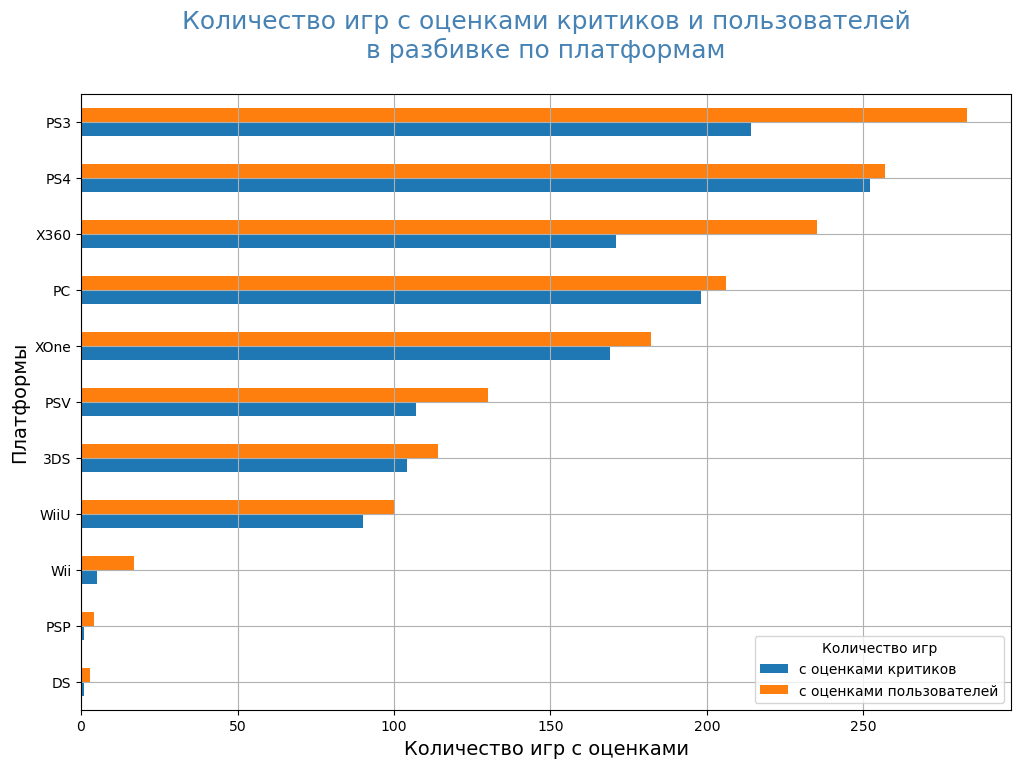

In [22]:
ax = (
    data_since_2012.groupby(by='platform')[['critic_score', 'user_score']].count()
    .sort_values(by=['user_score', 'critic_score'])
    .plot(kind='barh', figsize=(12,8), grid=True)
)
ax.set_title('Количество игр с оценками критиков и пользователей\nв разбивке по платформам\n', fontsize=18, color ='SteelBlue')
ax.set_xlabel('Количество игр с оценками', fontsize=14)
ax.set_ylabel('Платформы', fontsize=14)
plt.legend(['с оценками критиков', 'с оценками пользователей'], title='Количество игр');

Таким образом, мы не будем строить диаграммы рассеяния и расчитывать соответствеющие коэффициенты Пирсона для трёх платформ - Wii, PSP, DS, так как количество игр на этих платформах с указанными значениями оценок критиков и пользователей менее 50. 

Выберем в качестве примера для определения зависимости продаж от оценок критиков и пользователей, одну из самых популярных платформ за всё время - PS3.

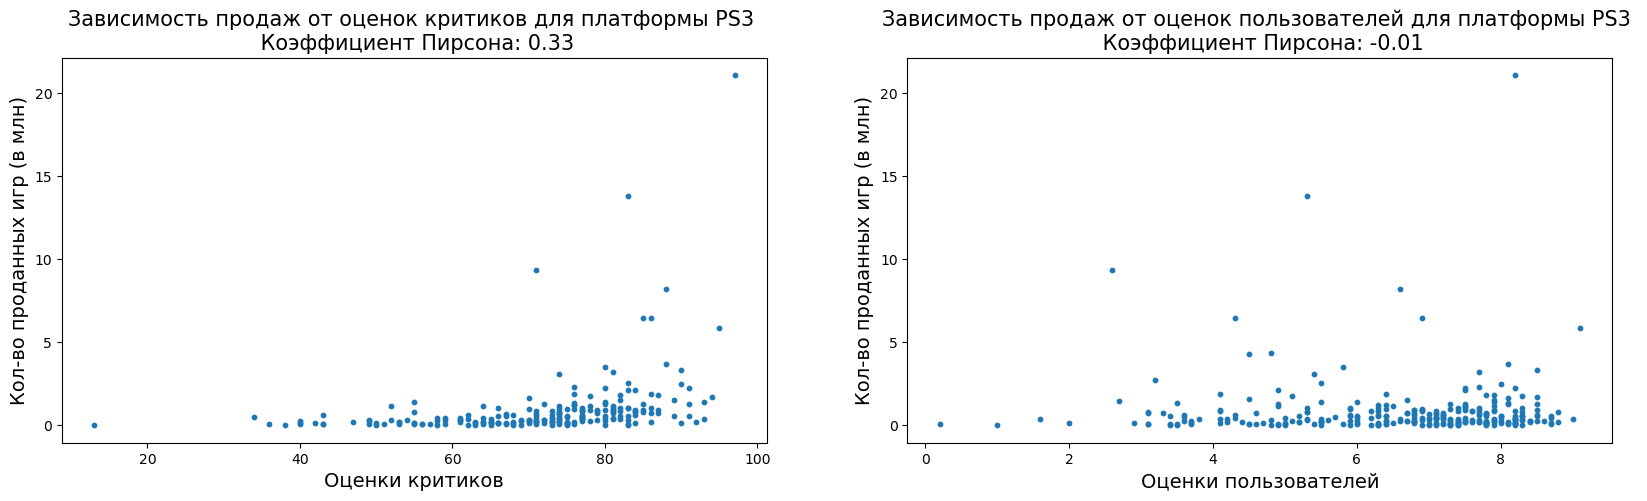

In [23]:
pirson_sales_critic = str(
    round(data_since_2012[data_since_2012['platform'] == "PS3"]['total_sales']
          .corr(data_since_2012[data_since_2012['platform'] == "PS3"]['critic_score']), 2)
)
user_sales_critic = str(
    round(data_since_2012[data_since_2012['platform'] == "PS3"]['total_sales']
          .corr(data_since_2012[data_since_2012['platform'] == "PS3"]['user_score']), 2)
)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 5))

ax0.set_title('Зависимость продаж от оценок критиков для платформы PS3 \n Коэффициент Пирсона: ' + pirson_sales_critic,
             fontsize=15)
ax0.set_xlabel('Оценки критиков', fontsize=14)
ax0.set_ylabel('Кол-во проданных игр (в млн)', fontsize=14)
ax0.scatter(
    x=data_since_2012[data_since_2012['platform'] == "PS3"]['critic_score'], 
    y=data_since_2012[data_since_2012['platform'] == "PS3"]['total_sales'], 
    s=10
);

ax1.set_title('Зависимость продаж от оценок пользователей для платформы PS3 \n Коэффициент Пирсона: ' + \
              user_sales_critic, fontsize=15)
ax1.set_xlabel('Оценки пользователей', fontsize=14)
ax1.set_ylabel('Кол-во проданных игр (в млн)', fontsize=14)
ax1.scatter(
    x=data_since_2012[data_since_2012['platform'] == "PS3"]['user_score'], 
    y=data_since_2012[data_since_2012['platform'] == "PS3"]['total_sales'], 
    s=10
);

Как видно по графикам и соответствующим коэффициентам Пирсона, продажи игр не зависят от оценок пользователей, а вот от оценок критиков зависят значительно сильнее, однако, даже в этом случае это зависимость не очень сильная.

Теперь построим такие же графики для остальных платформ, чтобы убедиться, что данные выводы справедливы и для них тоже.

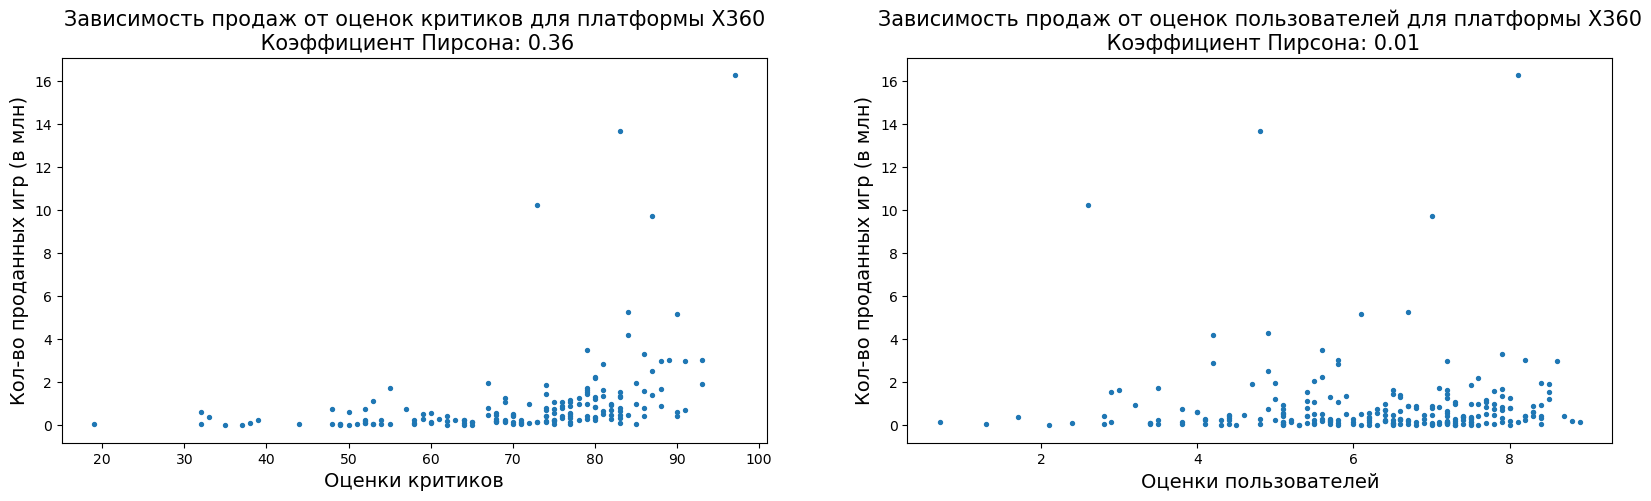

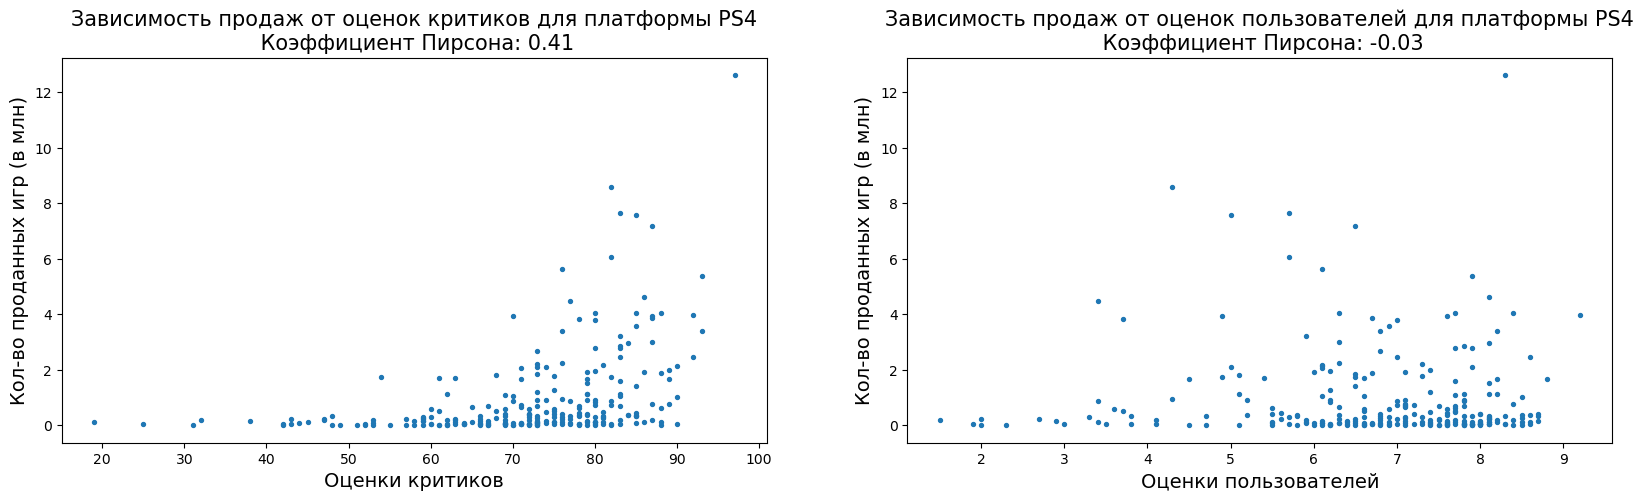

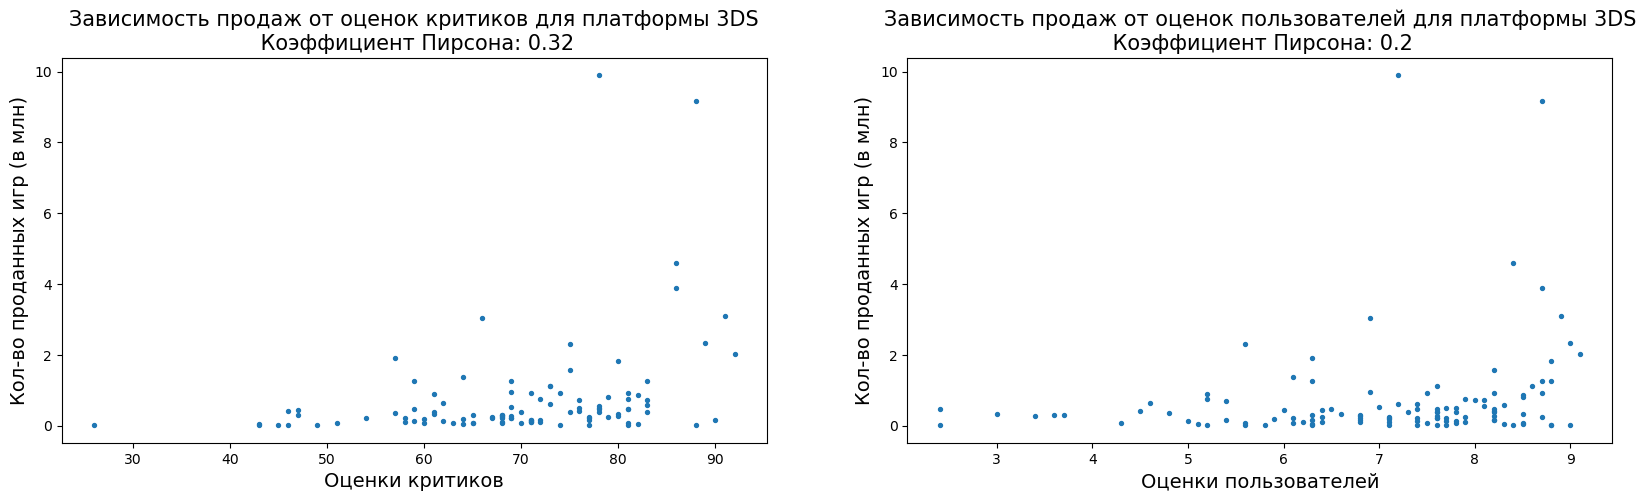

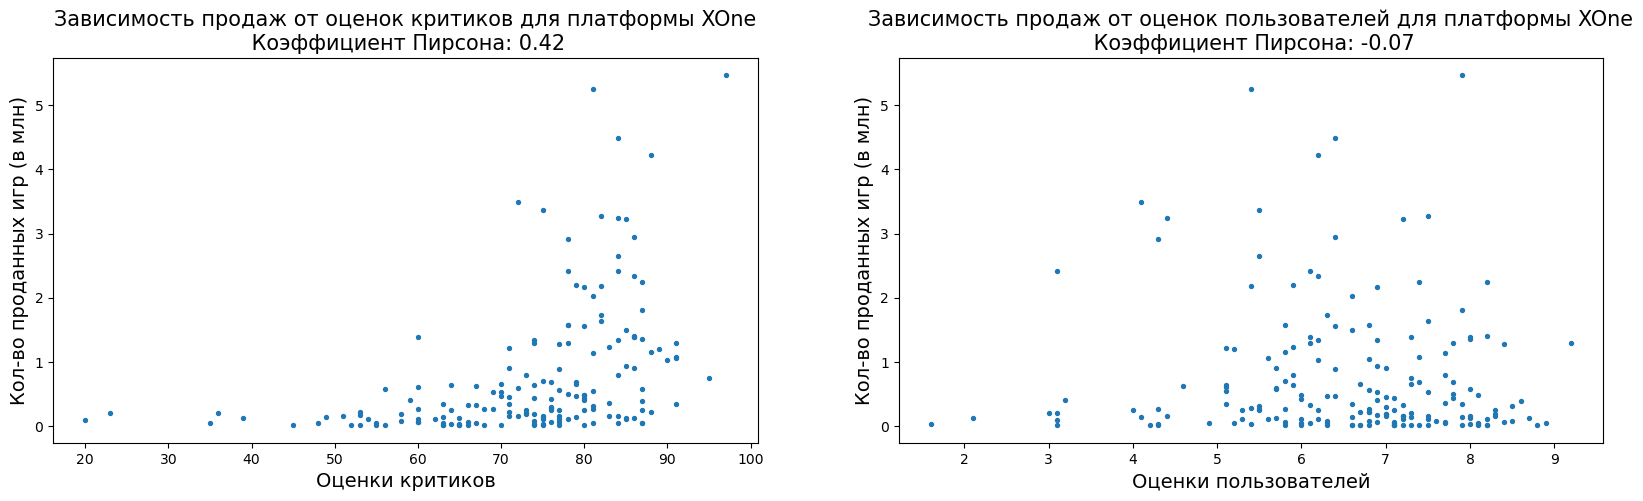

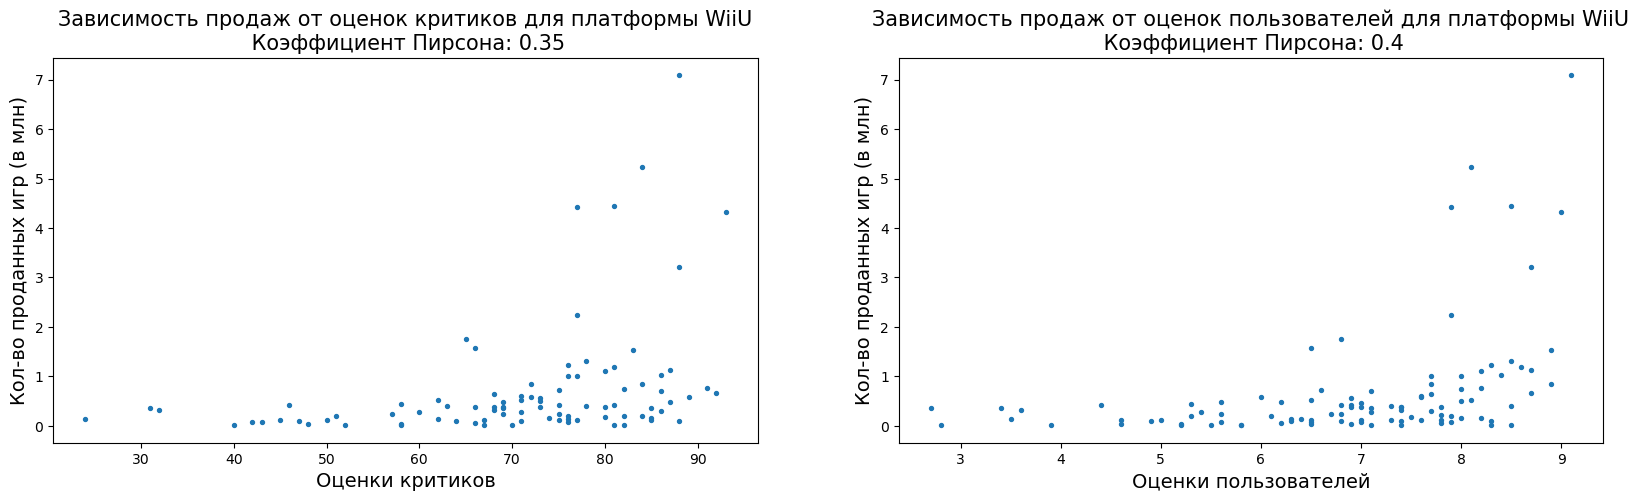

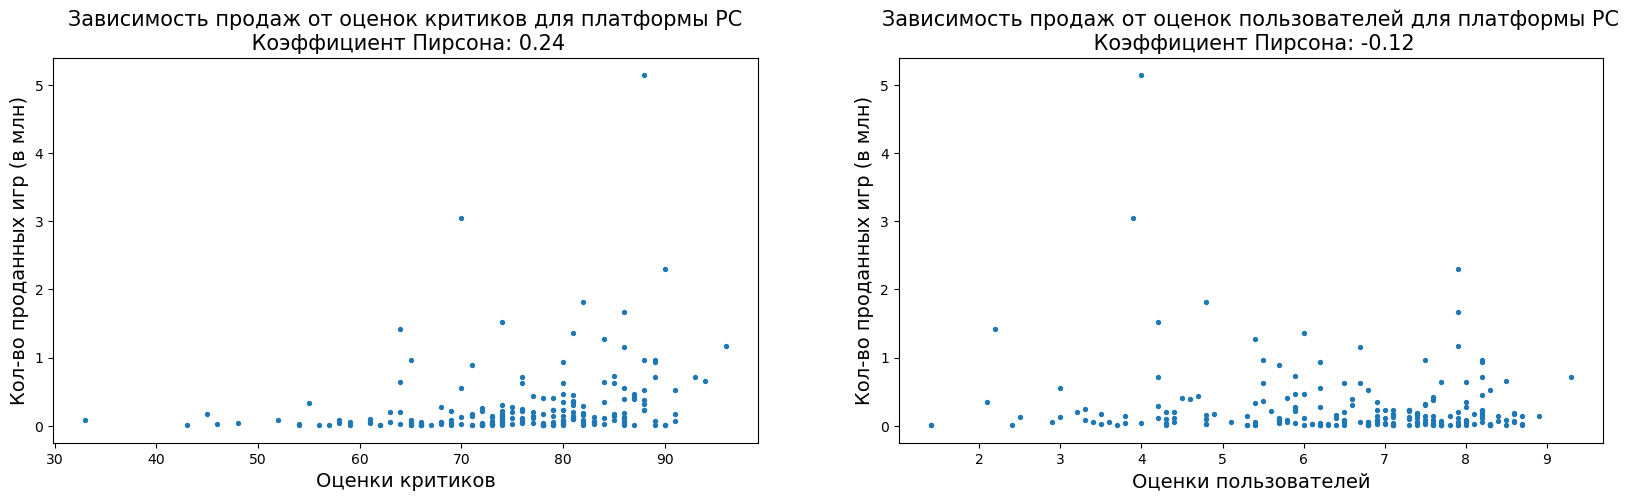

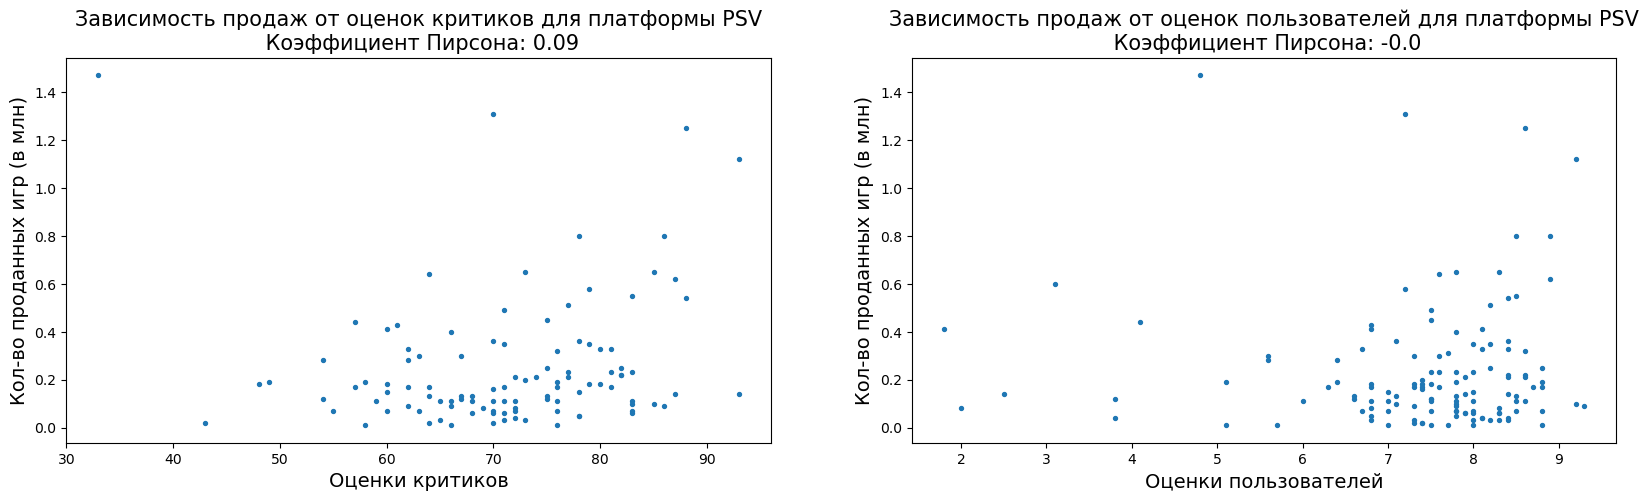

In [24]:
for platform_i in data_since_2012[data_since_2012['platform'] != "PS3"]['platform'].unique():
    data_platform_i = data_since_2012[data_since_2012['platform'] == platform_i]

    if (data_platform_i['user_score'].notna().sum() >= 50) or (data_platform_i['critic_score'].notna().sum() >= 50):

        pirson_sales_critic = str(
            round(data_platform_i['total_sales'].corr(data_platform_i['critic_score']), 2)
        )
        user_sales_critic = str(
            round(data_platform_i['total_sales'].corr(data_platform_i['user_score']), 2)
        )

        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 5))

        ax0.set_title('Зависимость продаж от оценок критиков для платформы ' + platform_i +
                      '\n Коэффициент Пирсона: ' + pirson_sales_critic, fontsize=15)
        ax0.set_xlabel('Оценки критиков', fontsize=14)
        ax0.set_ylabel('Кол-во проданных игр (в млн)', fontsize=14)
        ax0.scatter(
            x=data_platform_i['critic_score'], 
            y=data_platform_i['total_sales'], 
            s=8
        );

        ax1.set_title('Зависимость продаж от оценок пользователей для платформы ' + platform_i +
                      '\n Коэффициент Пирсона: ' + user_sales_critic, fontsize=15)
        ax1.set_xlabel('Оценки пользователей', fontsize=14)
        ax1.set_ylabel('Кол-во проданных игр (в млн)', fontsize=14)
        ax1.scatter(
            x=data_platform_i['user_score'], 
            y=data_platform_i['total_sales'], 
            s=8
        );

По графикам видно, что, действительно, коэффициент Пирсона для величин "суммарные продажи" и "оценки пользователей" колеблется вокруг 0, то есть зависимости между этими двумя величинами нет. Тогда как зависимость между продажами и оценками критиков явно есть и видна на графиках: чем выше оценки критиков, тем лучше продажи игр на соответствующих платформах (кроме платформы PSV, но это может быть связано с недостатком данных). Это подтверждают и значения коэффициентов Пирсона, которые во всех случаях больше соответствующих коэффициентов для величин "суммарные продажи" и "оценки пользователей". Однако зависимость продаж от оценок критиков не очень сильная, что можно понять по значениям коэффициентов Пирсона, которые во всех случаях, кроме как для платформы PSV, лежат в диапазоне от 0.24 до 0.42.

### 5.6. Распределение игр по жанрам

Посмотрим какую долю составляют игры каждого жанра, а также определим их продажи. Напомним, что мы рассматриваем период с 2012 по 2016 год.

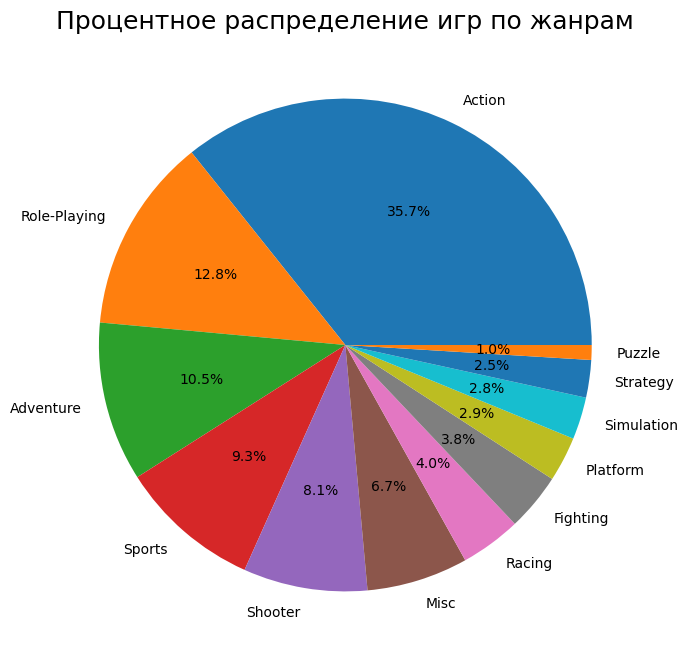

In [25]:
data_since_2012.value_counts('genre').plot.pie(y='genre', figsize=(8, 8), autopct='%.1f%%')
plt.ylabel(None)
plt.title('Процентное распределение игр по жанрам', fontsize=18);

По круговой диаграмме видно, что в топ-5 жанров по количеству выпускаемых игр входят: Action, Role-Playing, Adventure, Sports и Shooter (именно в таком порядке). При этом игры жанра Action составляют почти 36% от общего числа выпускаемых игр, а игры следующего по популярности жанра Role-Playing выпускаются почти в 3 раза меньше.

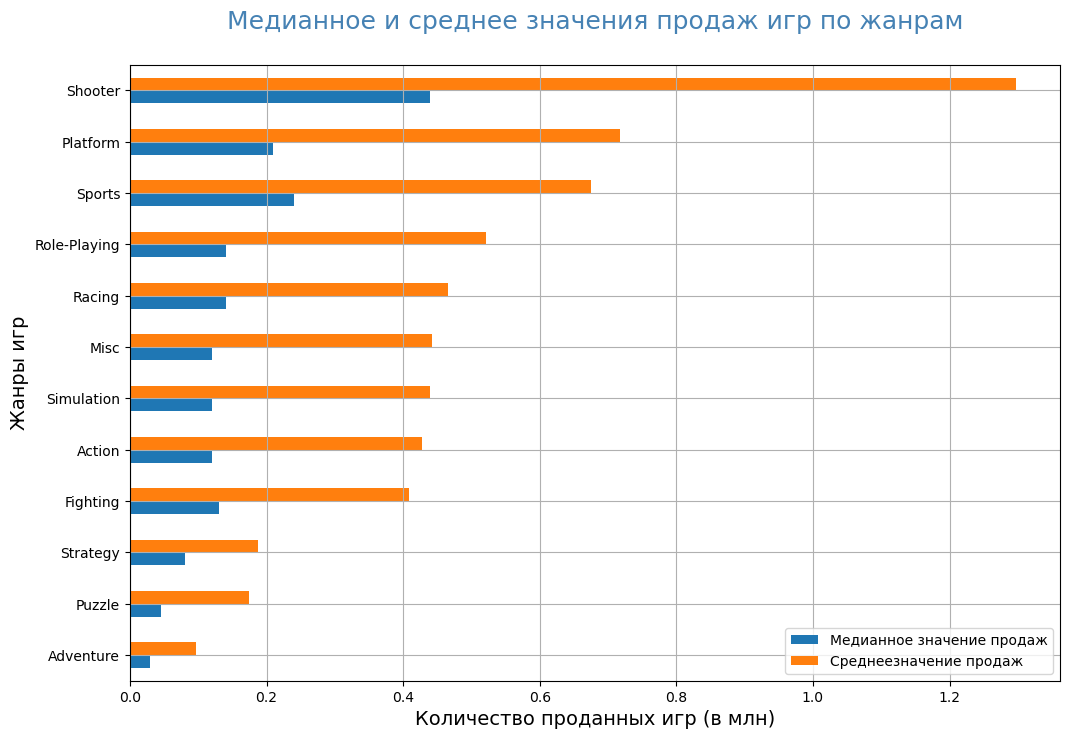

In [26]:
ax = (
    data_since_2012
    .pivot_table(index='genre', values='total_sales', aggfunc=['median', 'mean'])
    .sort_values(by=('mean', 'total_sales'))
    .plot(kind='barh', figsize=(12, 8), grid=True)
)
ax.set_title('Медианное и среднее значения продаж игр по жанрам\n', fontsize=18, color ='SteelBlue')
ax.set_xlabel('Количество проданных игр (в млн)', fontsize=14)
ax.set_ylabel('Жанры игр', fontsize=14)
plt.legend(['Медианное значение продаж', 'Среднеезначение продаж']);

По диаграмме видно, что у игр всех жанров среднее значение продаж больше медианного более чем в 2 раза. Это может свидетельствовать как о наличии большого числа не успешных игр (с маленькими продажами), так и о наличии небольшого числа очень успешных игр (с аномально большими продажами).

Топ-5 жанров с наибольшими средним и медианным значениями продаж за одну игру: Shooter, Sports, Platform, Role-Playing, Racing. В этом списке мы видим два жанра, - Platform и Racing, - у которых доля выпускаемых игр составляет всего 3-4%. Это говорит о том, что хоть игр с такими жанрами выпускается мало, но они очень популярны среди пользователей. 

Обратим внимание, что из топ-5 жанров по количеству выпускаемых игр самые большие медианное и среднее значение у жанра Shooter, хотя он находится только на 5 месте. А вот у жанра Adventure, находящегося на 3 месте по количеству выпускаемых игр, самые маленькие значения медианных и средних продаж среди всех жанров, то есть игры этого жанра наименее популярные (исключая игры с аномально высокими для этого жанра продажами). 

Однако по столбчатой диаграмме мы не можем увидеть как разбросаны значения вокруг медианы: много ли выбросов, насколько значения этих выбросов большие, много ли игр с очень маленькими значениями продаж. Для того чтобы это выяснить, построим диаграммы размаха продаж в разбивке по жанрам.

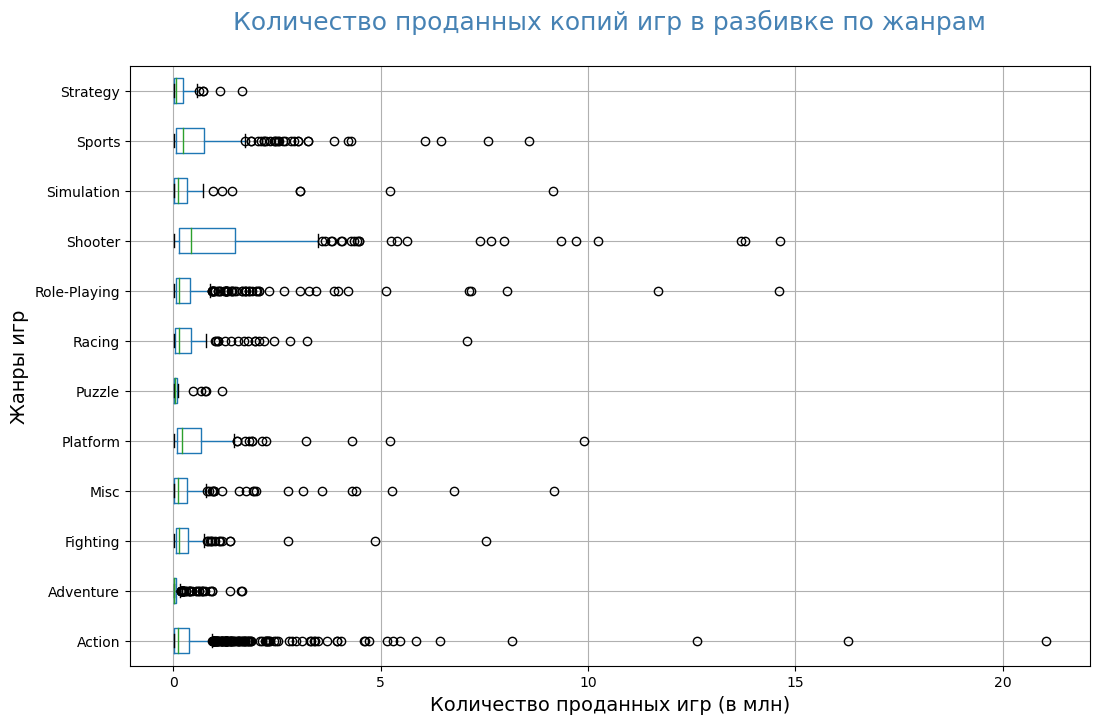

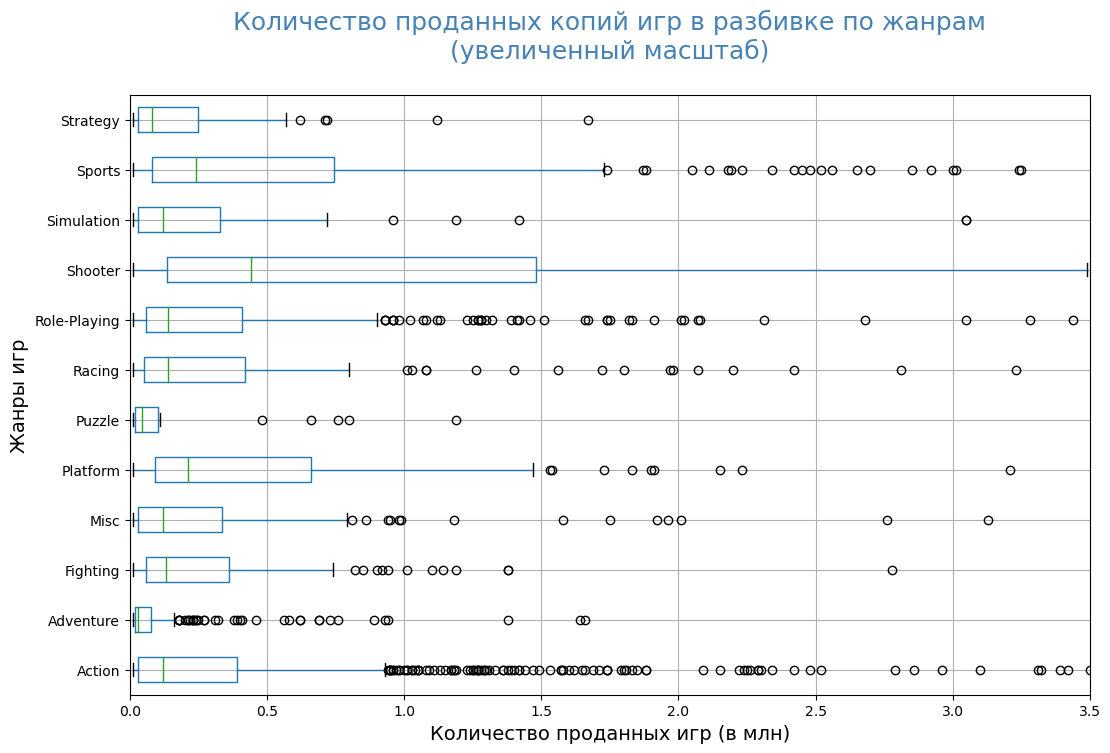

In [27]:
ax = data_since_2012.boxplot(by='genre', column='total_sales', figsize=(12, 8), vert=False)
ax.set_title('Количество проданных копий игр в разбивке по жанрам\n', fontsize=18, color ='SteelBlue')
plt.suptitle('')
ax.set_xlabel('Количество проданных игр (в млн)', fontsize=14)
ax.set_ylabel('Жанры игр', fontsize=14)

ax = data_since_2012.boxplot(by='genre', column='total_sales', figsize=(12, 8), vert=False)
ax.set_title('Количество проданных копий игр в разбивке по жанрам\n(увеличенный масштаб)\n', fontsize=18, color ='SteelBlue')
plt.suptitle('')
ax.set_xlabel('Количество проданных игр (в млн)', fontsize=14)
ax.set_ylabel('Жанры игр', fontsize=14)
plt.xlim(0, 3.5);

При рассмотрении диаграмм размаха будем обращать внимание на то, что чем правее начинается "коробочка", тем лучше, поскольку это значит, у таких жанров меньше игр с небольшими продажами.

По диаграммам размаха можно сделать следующие выводы.
* У жанра Shooter "коробочка" расположена правее остальных, а это говорит о том, что у этого жанра меньше всего (в процентном соотношении) игр с небольшими продажами. Кроме того, это "коробочка" сильно вытянута и длиннее остальных, это свидетельствует о большом разбросе в продажах игр, но также говорит о том, игры этого жанра с большей вероятностью будут более популярны, чем игры других жанров.
* У жанров Sports и Platform "коробочки" начинаются примерно на одном уровне. Однако медианное значение у жанра Sports немного больше, а "коробочка" более вытянутая, а значит игры этого жанра вероятнее будут прибыльнее. 
* Медианные значения продаж игр жанров Role-Playing и Racing примерно равны, однако, "коробочка" жанра Role-Playing начинается немного правее, а значит игры этого жанра с меньшей вероятностью будут менее прибыльными. Здесь же отметим жанр Fighting: его медианное значение совсем немного меньше, чем у жанров Role-Playing и Racing, и при этом начало его "коробочки" на одном уровне с Role-Playing, то есть больше Racing.
* Заметим, что у жанра Action с самым большим количеством выпускаемых игр медианное значение и значение 1-го квантиля одни из самых небольших. Однако у него же самое большое количество выбросов, причём самая продаваемая игра с 2012 по 2016 год также была жанра Action. Всё это говорит о том, что игры этого жанра имеют большой разброс: игра может стать как очень популярной, так и совсем не популярной.
* Самыми не популярными играми являются игры жанров Puzzle и Adventure, именно игры этих жанров меньше всего покупают. 

Таким образом, игры жанров Shooter, Sports, Platform, Role-Playing, Racing и Fighting стабильно приносят высокий доход, а игры жанров Adventure и Puzzle - низкий.

## 6. Составление портрета пользователя Северной Америки, Европы и Японии

### 6.1. Топ-5 самых популярных игровых жанров для пользователей Северной Америки, Европы и Японии

Для каждого из трёх регионов составим круговую диаграмму с долями игр каждого жанра. Рассматриваем только актуальный период с 2012 по 2016 год.

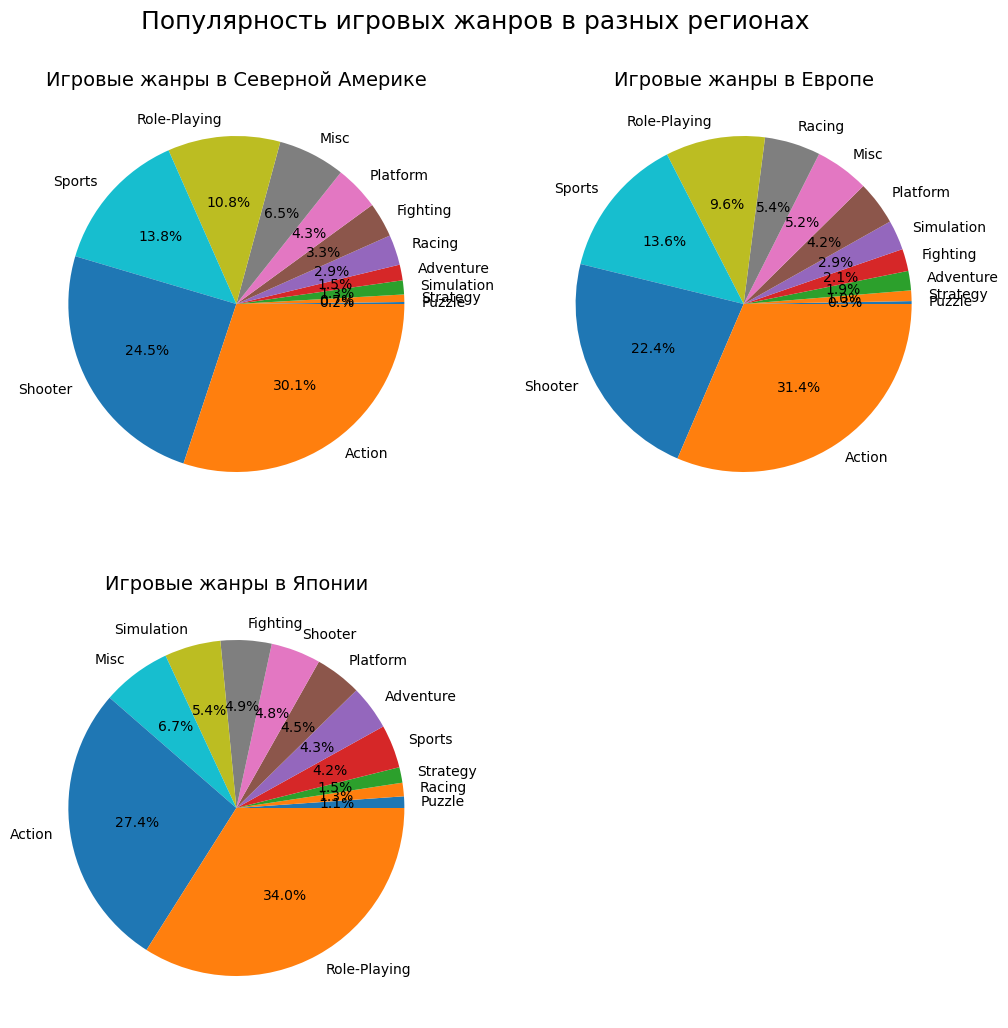

In [28]:
fig = plt.figure(figsize=(12, 12))

columns = ['na_sales', 'eu_sales', 'jp_sales']
regions = ['Северной Aмерике', 'Европе', 'Японии']
for i, region in zip(range(len(columns)), regions):
    ax = fig.add_subplot(2, 2, i+1)
    
    col = columns[i] 
    
    ax.set_title('Игровые жанры в ' + region, fontsize=14)
    ax.pie(
        x=data_since_2012.groupby(by='genre')[col].sum().sort_values(), 
        labels=data_since_2012.groupby(by='genre')[col].sum().sort_values().index, 
        autopct='%.1f%%'
    )
    
plt.suptitle('Популярность игровых жанров в разных регионах', y=0.95, fontsize=18);

Топ-5 самых популярных жанров:
* в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc;
* в Европе: Action, Shooter, Sports, Role-Playing, Racing;
* в Японии: Role-Playing, Action, Misc, Simulation, Fighting.

По диаграммам можно сделать следующие выводы.
* Жанр Action один из самых популярных во всех трёх регионах. В Северной Америке и Европе игры этого жанра на первом месте по популярности, а в Японии на 2; про этом доля игр этого жанра во всех регионах около 30%.
* В Северной Америке и Европе также очень популярны жанры Shooter, Sports и Role-Playing, это находятся соответственно на 2, 3 и 4 местах в обоих регионах и их доли в этих регионах примерно равны. В Японии же жанры Shooter и Sports намного менее популярны, их продажи в этом регионе примерно в 5 и 3 раза меньше, чем в Северной Америке и Европе соответственно.
* В Японии же самым популярным является жанр Role-Playing, который в других регионах находится лишь на 4 месте. Доля этого жанра в Японии составляет 34%, что примерно в 3 раза больше чем в Северной Америке и Европе.
* В Японии ярко выражена популярность 2 жанров (Action, Role-Playing); доли же остальных жанров значительно меньше долей этих двух.
* Жанр Misc входит в топ-5 жанров в Северной Америке и Японии, а в Европе находится на 6 месте. При этом доля игр этого жанра во всех трёх регионах примерно одинаковая.
* Самыми непопулярными (входят в топ-3 наименее продаваемых) во всех трёх регионах являются игры жанров Strategy и Puzzle.

### 6.2. Топ-5 самых популярных платформ для пользователей Северной Америки, Европы и Японии

Для каждого из трёх регионов составим круговую диаграмму с долями игровых платформ. Рассматриваем только актуальный период с 2012 по 2016 год.

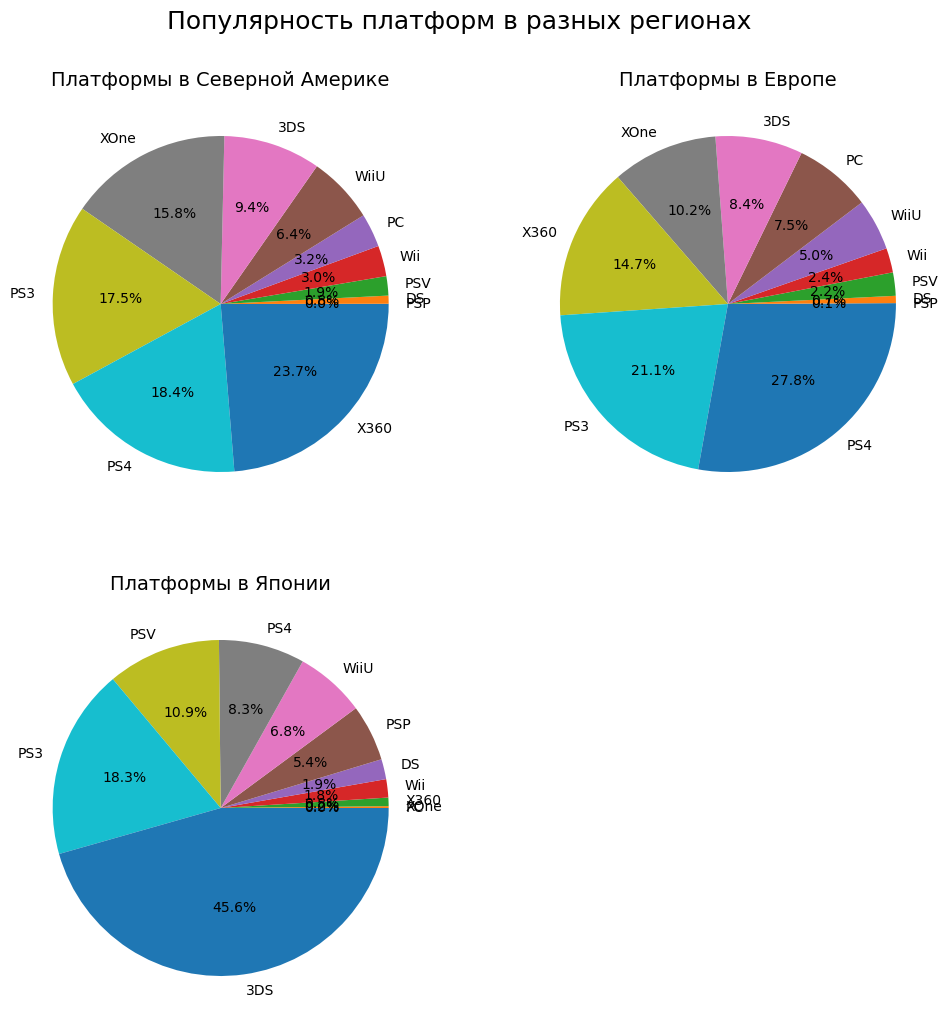

In [29]:
fig = plt.figure(figsize=(12, 12))

columns = ['na_sales', 'eu_sales', 'jp_sales']
regions = ['Северной Aмерике', 'Европе', 'Японии']
for i, region in zip(range(len(columns)), regions):
    ax = fig.add_subplot(2, 2, i+1)
    
    col = columns[i] 
    
    ax.set_title('Платформы в ' + region, fontsize=14)
    ax.pie(
        x=data_since_2012.groupby(by='platform')[col].sum().sort_values(), 
        labels=data_since_2012.groupby(by='platform')[col].sum().sort_values().index, 
        autopct='%.1f%%'
    )
    
plt.suptitle('Популярность платформ в разных регионах', y=0.95, fontsize=18);

Топ-5 самых популярных платформ:
* в Северной Америке: X360, PS4, PS3, XOne, 3DS;
* в Европе: PS4, PS3, X360, XOne, 3DS;
* в Японии: 3DS, PS3, PSV, PS4, WiiU.

По диаграммам можно сделать следующие выводы.
* В Северной Америке и Европе в топ-5 входят одни и те же платформы, но с разными долями.
* В топ-5 самых популярных платформы во всех трёх регионах входят платформы 3DS, PS3, PS4. При этом доля платформы PS3 во всех регионах примерно одинаковая; доля игр на платформе PS4 в Японии в несколько раз меньше, чем в Северной Америке и Европе.
* В Японии самая популярная платформа - 3DS, - занимает почти 50% всего рынка игровых платформ.
* В Японии в топ-5 самых популярных платформ входит платформа PSV, которая в Северной Америке и Европе занимает одно из последних мест; её доля в этих регионах примерно в 5 раз меньше, чем в Японии.
* Несмотря на то, что платформа WiiU входит в топ-5 самых популярных платформ только в Японии, доля игр на этой платформе в Северной Америке и Европе примерно такая же, как и в Японии.
* Платформы X360 и XOne являются одними из самых популярных в Северной Америке и Европе, однако в Японии доля игр на этих платформах крайне мала - меньше 1% для каждой из платформ. 
* Самыми непопулярными в Северной и Европе являются платформы Wii, PSV, DS, PSP, их доля в этих регионах меньше 3%. Самыми непопулярными В Японии являются платформы DS, Wii, X360, XOne, PC, их доли меньше 2% для каждой из платформ. Таким образом, наиболее непопулярными платформами во всех трёх регионах являются платформы Wii и DS.

Можно предположить, что такая разница в долях самых популярных платформ связана с различием в предпочтениях в игровых жанрах в трёх регионах, а также со страной-производителем игровых платформ.

### 6.3. Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии

Чтобы определить, влияет ли рейтинг ESRB на продажи в Северной Америке, Европе и Японии, построим диаграмму продаж во всех трёх регионах в разбивке по рейтингу.

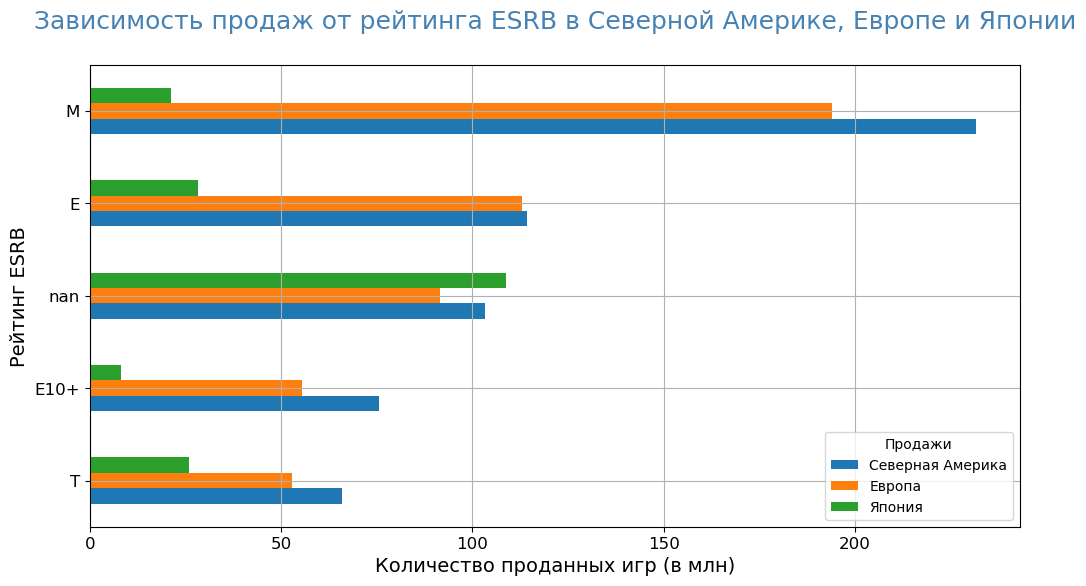

In [30]:
ax = (
    data_since_2012.groupby(by='rating', dropna=False)[['na_sales', 'eu_sales', 'jp_sales']].sum()
    .sort_values(by='na_sales')
    .plot(kind = 'barh', figsize = (12, 6), fontsize = 12, grid=True)
)
ax.set_title('Зависимость продаж от рейтинга ESRB в Северной Америке, Европе и Японии\n', fontsize=18, color ='SteelBlue')
ax.set_xlabel('Количество проданных игр (в млн)', fontsize=14)
ax.set_ylabel('Рейтинг ESRB', fontsize=14)
plt.legend(['Северная Америка', 'Европа', 'Япония'], title='Продажи');

По диаграмме можно сделать следующие выводы.
* Рейтинг ESRB влияет на продажи во всех трёх регионах.
* Популярность игр с разными рейтингами в Северной Америке и Европе убывает в следующем порядке: M (для взрослых, 17+ лет), E (для всех), игры без рейтинга ESRB, E10+ (для всех от 10 лет и старше), T (для подростков, 13+ лет).
* Популярность игр с разными рейтингами в Японии убывает в следующем порядке: игры без рейтинга ESRB, E, T, M, E10+.
* Самые большие продажи игр с любым рейтингом ESRB в Северной Америке, а самые маленькие в Японии. 
* Самые большие продажи игр без рейтинга в Японии. Причём продажи игр без рейтинга в Японии больше, чем сумма продаж всех игр с рейтингом ESRB в этой стране. 
* Игры с рейтингом M являются самыми популярными, если рассматривать в сумме по всем трём регионам. Далее по суммарным продажам идут игры без рейтинга, затем с рейтингом E, T и E10+.

## 7. Проверка статистических гипотез

### 7.1. Проверка гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Исходя из предположения о том, что средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые, сформулируем следующие нулевую и первую гипотезы.
* H0: средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC.
* H1: средний пользовательский рейтинг платформы Xbox One != средний пользовательский рейтинг платформы PC.

В этом случае мы проверяем двустороннюю гипотезу и для её проверки мы будем использовать соответствующий метод: метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `scipy.stats.ttest_ind`.

Исследование будем проводить в актуальном периоде, то есть с данными за 2012-2016 года.

In [31]:
alpha = .05 # критический уровень статистической значимости; если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_since_2012.query('platform == "XOne" and user_score.notna()')['user_score'], 
    data_since_2012.query('platform == "PC" and user_score.notna()')['user_score']
)

print('p-value:', round(results.pvalue, 3))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-value: 0.554
Не отвергаем нулевую гипотезу


Таким образом, мы не отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

### 7.2. Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные

Исходя из предположения о том, что средние пользовательские рейтинги жанров Action и Sports разные, сформулируем следующие нулевую и первую гипотезы.
* H0: средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports.
* H1: средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports.

В этом случае мы проверяем двустороннюю гипотезу и для её проверки мы будем использовать соответствующий метод: метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `scipy.stats.ttest_ind`.

In [32]:
alpha = .05 # критический уровень статистической значимости; если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_since_2012.query('genre == "Action" and user_score.notna()')['user_score'], 
    data_since_2012.query('genre == "Sports" and user_score.notna()')['user_score']
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-value: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Таким образом, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы об их различии.

## 8. Выводы

* До 1995 года каждый год выпускалось менее 200 компьютерных игр каждый год, а заметный рост числа выпускаемых игр начался после 2001 года. **В 2008-2009 годах количество выпускаемых игр достигло своего пика, после чего начало сокращаться**.
* Наибольшие суммарные продажи за всё время (с 1980 по 2016 год) имеют 6 платформ - PS2, X360, PS3, Wii, DS, PS; у остальные платформ это значение меньше более, чем в 2 раза. На примере этих платформ можно заключить, что **срок "жизни" популярных платформ составляет 10-12 лет**. Первые несколько лет платформа набирает популярность: продажи игр на платформе в течение нескольких лет увеличиваются. Затем суммарные продажи достигают своего пика, после чего начинают постепенно снижаться. Указанные 6 популярных платформ в 2016 году находятся на стадии спада продаж, причём эти продажи минимальны, или игры на этих платформах уже не выпускаются.

**1. Потенциально прибыльные в 2017 году платформы.**
* Потенциально прибыльными платформами в 2017 году являются платформы 3DS, PC, PS4, XOne. Причём из них наиболее перспективными являются платформы PS4, XOne, поскольку они также были лидерами по продажам в 2016 году, а выпуск игр на этих платформах с каждым годом увеличивается.
* При выборе потенциально прибыльных платформ учитывались следующие критерии.
  - Продажи игр на платформе за 2016 год составляли более 5 млн копий. При этом, если продажи за 2016 год были близки к 5 млн, то в этом случае дополнительно учитываем следующее условие: в период сокращения продаж (все года после года с максимальными продажами) не было таких лет, в которые продажи бы сокращались более, чем на 50% по сравнению с предыдущим годом. Такое условие немного обезопасит нас от того, что в 2017 году продажи резко упадут в 2 раза и более (до 2.5 млн и ниже), однако, не гарантирует этого.
  - Количество выпускаемых игр под платформу должно либо увеличиваться, либо изменения должны быть незначительные (стагнация). Если же количество выпускаемых игр уменьшается, то должны выполняться следующие условия: 1) за 2016 год было выпущено не менее 20 игр на этой платформе; 2) если количество выпущенных в 2016 году примерно равно 20, то в период сокращения количества выпускаемых игр не должно быть таких лет, в которые бы выпуск сокращался более, чем на 50% по сравнению с предыдущим годом. Такое условие немного обезопасит нас от того, что в 2017 году выпуск игр резко упадёт в 2 раза и более (до 10 игр в год и менее), однако, не гарантирует этого.
  
**2. Продажи игр в зависимости от платформ, жанров и оценок критиков и пользователей.**
* У всех платформ, кроме X360, медианное значение продаж не превышает 0.25 млн копий за одну игру, выпущенную после 2011 года.
* У многих платформ больше 10 выбросов, однако, есть платформы и с небольшим их количеством, такие как DS, PSP, Wii. Это говорит о том, что у остальных платформ было достаточно много игр, продажи которых были значительно больше, чем продажи подавляющего большинства игр на этих платформах. 
* Есть 4 платформы, у которых продажи некоторых игр больше чем в 40 раз превышают медианный показатель, это платформы X360, PS4, PS3, 3DS. 
* 75% игр, выпускаемых с 2012 по 2016 год на платформах  PSV, PSP, DS, PS, продавались примерно одинаково, то есть были одинаково популярны. Для платформ XOne, X360, Wii, PS4, PS3, напротив, характерна неравномерная популярность игр.
* Наименьший разброс продаж игр был у на платформе PSP, то есть все игры, выпускаемые с 2012 по 2016 год на этой платформе, имели примерно одинаковую популярность у пользователей, и лишь небольшое их количество продавалось лучше, чем остальные.
* Продажи игр не зависят от оценок пользователей, но зависят от оценок критиков: чем выше оценки критиков, тем выше продажи, - однако, эта зависимость не очень сильная.
* В топ-5 жанров по количеству выпускаемых игр входят: Action, Role-Playing, Adventure, Sports и Shooter (именно в таком порядке). При этом игры жанра Action составляют почти 36% от общего числа выпускаемых игр, а игры следующего по популярности жанра Role-Playing выпускаются почти в 3 раза меньше.
* Для всех жанров характерно, что среднее значение продаж игровых копий больше медианного более чем в 2 раза. 
* Стабильно высокий доход приносят игры жанров Shooter, Sports, Platform, Role-Playing, Racing, Fighting. У трёх жанров в этом списке, - Platform, Racing, Fighting, - доля выпускаемых игр составляет всего 3-4%. Это говорит о том, что хоть игр с такими жанрами выпускается мало, но они очень популярны среди пользователей. 
* Медианное и среднее значения продаж игр жанра Shooter примерно в 2 и более раз больше, чем соответствующие значения у всех остальных жанров.
* Стабильно низкий доход приносят игры жанров Adventure и Puzzle. При этом у жанра Adventure, находящегося на 3 месте по количеству выпускаемых игр, самые маленькие значения медианных и средних продаж среди всех жанров, то есть игры этого жанра наименее популярные (исключая игры с аномально высокими для этого жанра продажами). 
* У жанра Action с самым большим количеством выпускаемых игр медианное значение одно из самых небольших, кроме того, значение 1-го квантиля одно из самых маленьких среди всех жанров. Однако у него же самое большое количество выбросов, причём самая продаваемая игра с 2012 по 2016 год также была жанра Action. Таким образом, игры этого жанра имеют большой разброс в продажах: игра может стать как очень популярной, так и совсем не популярной.

**3. Популярные игровые жанры в Северной Америке, Европе и Японии.**
* Топ-5 самых популярных жанров:
  - в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc;
  - в Европе: Action, Shooter, Sports, Role-Playing, Racing;
  - в Японии: Role-Playing, Action, Misc, Simulation, Fighting.
* Жанр Action один из самых популярных во всех трёх регионах. В Северной Америке и Европе игры этого жанра на первом месте по популярности, а в Японии на 2; про этом доля игр этого жанра во всех регионах около 30%.
* В Северной Америке и Европе также очень популярны жанры Shooter, Sports и Role-Playing, это находятся соответственно на 2, 3 и 4 местах в обоих регионах и их доли в этих регионах примерно равны. В Японии же жанры Shooter и Sports намного менее популярны, их продажи в этом регионе примерно в 5 и 3 раза меньше, чем в Северной Америке и Европе соответственно.
* В Японии самым популярным является жанр Role-Playing, который в других регионах находится лишь на 4 месте. Доля этого жанра в Японии составляет 34%, что примерно в 3 раза больше чем в Северной Америке и Европе.
* В Японии ярко выражена популярность 2 жанров (Action, Role-Playing); доли же остальных жанров значительно меньше долей этих двух.
* Жанр Misc входит в топ-5 жанров в Северной Америке и Японии, а в Европе находится на 6 месте. При этом доля игр этого жанра во всех трёх регионах примерно одинаковая.
* Самыми непопулярными (входят в топ-3 наименее продаваемых) во всех трёх регионах являются игры жанров Strategy и Puzzle.

**4. Популярные игровые платформы в Северной Америке, Европе и Японии.**
* Топ-5 самых популярных платформ:
  - в Северной Америке: X360, PS4, PS3, XOne, 3DS;
  - в Европе: PS4, PS3, X360, XOne, 3DS;
  - в Японии: 3DS, PS3, PSV, PS4, WiiU.
* В Северной Америке и Европе в топ-5 входят одни и те же платформы, но с разными долями.
* В топ-5 самых популярных платформы во всех трёх регионах входят платформы 3DS, PS3, PS4. При этом доля платформы PS3 во всех регионах примерно одинаковая; доля игр на платформе PS4 в Японии в несколько раз меньше, чем в Северной Америке и Европе.
* В Японии самая популярная платформа - 3DS, - занимает почти 50% всего рынка игровых платформ.
* В Японии в топ-5 самых популярных платформ входит платформа PSV, которая в Северной Америке и Европе занимает одно из последних мест; её доля в этих регионах примерно в 5 раз меньше, чем в Японии.
* Несмотря на то, что платформа WiiU входит в топ-5 самых популярных платформ только в Японии, доля игр на этой платформе в Северной Америке и Европе примерно такая же, как и в Японии.
* Платформы X360 и XOne являются одними из самых популярных в Северной Америке и Европе, однако в Японии доля игр на этих платформах крайне мала - меньше 1% для каждой из платформ. 
* Самыми непопулярными в Северной и Европе являются платформы Wii, PSV, DS, PSP, их доля в этих регионах меньше 3%. Самыми непопулярными В Японии являются платформы DS, Wii, X360, XOne, PC, их доли меньше 2% для каждой из платформ. Таким образом, наиболее непопулярными платформами во всех трёх регионах являются платформы Wii и DS.
* Можно предположить, что разница в долях самых популярных платформ связана с различием в предпочтениях в игровых жанрах в трёх регионах, а также со страной-производителем игровых платформ.

**5. Влияние рейтинга ESRB на продажи в регионах Северной Америке, Европе и Японии.**
* Рейтинг ESRB влияет на продажи во всех трёх регионах.
* Популярность игр с разными рейтингами в Северной Америке и Европе убывает в следующем порядке: M (для взрослых, 17+ лет), E (для всех), игры без рейтинга ESRB, E10+ (для всех от 10 лет и старше), T (для подростков, 13+ лет).
* Популярность игр с разными рейтингами в Японии убывает в следующем порядке: игры без рейтинга ESRB, E, T, M, E10+.
* Самые большие продажи игр с любым рейтингом ESRB в Северной Америке, а самые маленькие в Японии. 
* Самые большие продажи игр без рейтинга в Японии. Причём продажи игр без рейтинга в Японии больше, чем сумма продаж всех игр с рейтингом ESRB в этой стране. 
* Игры с рейтингом M являются самыми популярными, если рассматривать в сумме по всем трём регионам. Далее по суммарным продажам идут игры без рейтинга, затем с рейтингом E, T и E10+.